<a href="https://colab.research.google.com/github/Samdatascienti/Samdatascienti/blob/main/drug_modelling_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In order to acces different libraries we need, we imported the following librariies first pandas as pd, numpy as np and files to help us to access files in google drive

In [1]:
# as usual, let us load all the necessary libraries
import numpy as np  # numerical computation with arrays
import pandas as pd # library to manipulate datasets using dataframes
import scipy as sp  # statistical library
from google.colab import files

# below sklearn libraries for different models
from sklearn.tree import DecisionTreeClassifier as DecisionTree
from sklearn.ensemble import RandomForestClassifier as RandomForest
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.impute import KNNImputer
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import MinMaxScaler

#import libraries for implementing neural networks
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD, Adam
from keras.regularizers import l2
from math import sqrt
from numpy import concatenate
from matplotlib import pyplot
from pandas import read_csv
from pandas import DataFrame
from pandas import concat
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.preprocessing.sequence import TimeseriesGenerator
import tensorflow as tf
# plot 
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
mpl.rcParams['figure.figsize']=(10,8)
mpl.rcParams['axes.grid']='False'


when you are using google colab, it is possible to access data from google drive, but the user must give access by using drive.mount the content in google drive, then we click to the link provided to confirm the account where data are located, the system will provide codes to paste in python in order to access our data.

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


# 2015 data

the data were collected in different years, and different quarters. All data were uploaded in google drive. function of read_excel from pandas library were used to import data which was in xlsx format into dataframe, the cell bellow inludes 2015 years consumption data, imported by quarters, in order to see the data, only 5 observations were printed in data of last quarter.

In [3]:
# path='/content/gdrive/MyDrive/Drug_prediction/Purchase_order_2015_2020.csv'
path_51='/content/gdrive/MyDrive/Drug_prediction/2015/3Months_01to03_2015.xlsx'
path_52='/content/gdrive/MyDrive/Drug_prediction/2015/3Months_04to06_2015.xlsx'
path_53='/content/gdrive/MyDrive/Drug_prediction/2015/3Months_07to09_2015.xlsx'
path_54='/content/gdrive/MyDrive/Drug_prediction/2015/3Months_10to12_2015.xlsx'
# importing file
data_51=pd.read_excel(path_51)
data_52=pd.read_excel(path_52)
data_53=pd.read_excel(path_53)
data_54=pd.read_excel(path_54)
data_51 = data_51[['QTY_AMOUNT','DESCRIPTION','S_LEVEL3_NAME','SITE_NAME','YEAR_MONTH']]
data_52 = data_52[['QTY_AMOUNT','DESCRIPTION','S_LEVEL3_NAME','SITE_NAME','YEAR_MONTH']]
data_53 = data_53[['QTY_AMOUNT','DESCRIPTION','S_LEVEL3_NAME','SITE_NAME','YEAR_MONTH']]
data_54 = data_54[['QTY_AMOUNT','DESCRIPTION','S_LEVEL3_NAME','SITE_NAME','YEAR_MONTH']]
data_5 = pd.concat([data_51, data_52,data_53,data_54], axis=0)
data_54.head()

,QTY_AMOUNT,DESCRIPTION,S_LEVEL3_NAME,SITE_NAME,YEAR_MONTH
0,324.0,ARTE 20MG + LUME 120MG TAB (3X6) B/30,Kirehe,RUSUMO CS--432,2015-12
1,245.0,ARTE 20MG+LUME 120MG DISP TAB (1X6) B/30,Kirehe,RUSUMO CS--432,2015-11
2,31.0,DEXAMETHASONE 4MG/ML 1ML INJECTION B/100,Rusizi,MUSHAKA CS--246,2015-10
3,24118.0,PARACETAMOL 500 MG TABLET B/1000,Rusizi,BUGARAMA CS--495,2015-12
4,1.0,READING GLASSES + 2.5 POWER,Rusizi,BUGARAMA CS--495,2015-12


In order to reduce the number of variables that are not useful to our tasks, only five column were retained which inludes quantity of drugs consumed, the name of drug consumed, districts of consumer, health center or hospital, year and month of consumption and were performed in all quarters. After that we combined all quarters dataframe into one with pandas function contatenate that serves to combine two dataframe.

# 2016 data

2016 year excel data were imported by using function of read_excel from pandas library into dataframe. In order to reduce the number of variables that are not useful to our tasks, only five column were retained which inludes quantity of drugs consumed, the name of drug consumed, districts of consumer, health center or hospital, year and month of consumption and were performed in all quarters. After that we combined all quarters dataframe into one. we printed only 5 observations for confirmation.

In [4]:
path_61='/content/gdrive/MyDrive/Drug_prediction/2016/3Months_01to03_2016.xlsx'
path_62='/content/gdrive/MyDrive/Drug_prediction/2016/3Months_04to06_2016.xlsx'
path_63='/content/gdrive/MyDrive/Drug_prediction/2016/3Months_07to09_2016.xlsx'
path_64='/content/gdrive/MyDrive/Drug_prediction/2016/3Months_09to12_2016.xlsx'
# importing file
data_61=pd.read_excel(path_61)
data_62=pd.read_excel(path_62)
data_63=pd.read_excel(path_63)
data_64=pd.read_excel(path_64)
data_61 = data_61[['QTY_AMOUNT','DESCRIPTION','SITE_NAME','S_LEVEL3_NAME','YEAR_MONTH']]
data_62 = data_62[['QTY_AMOUNT','DESCRIPTION','SITE_NAME','S_LEVEL3_NAME','YEAR_MONTH']]
data_63 = data_63[['QTY_AMOUNT','DESCRIPTION','SITE_NAME','S_LEVEL3_NAME','YEAR_MONTH']]
data_64 = data_64[['QTY_AMOUNT','DESCRIPTION','SITE_NAME','S_LEVEL3_NAME','YEAR_MONTH']]
data_6 = pd.concat([data_61, data_62,data_63,data_64], axis=0)
data_6.head()

,QTY_AMOUNT,DESCRIPTION,SITE_NAME,S_LEVEL3_NAME,YEAR_MONTH
0,92.0,ACETYLSALICYLATE LYSINE 500MG INJ B/50,NYAKARENZO CS--1233,Rusizi,2016-03
1,1126.0,AMINOPHYLLINE 100MG TABLET B/1000,NYAKARENZO CS--1233,Rusizi,2016-03
2,4.0,AMINOPHYLLINE 25MG/ML INJECTION B/100,GASHORA CS--447,Bugesera,2016-03
3,2260.0,OMEPRAZOLE 20MG CAPSULE B/100,NYAMYUMBA CS--76,Nyaruguru,2016-03
4,36.0,EXAMINATION GLOVES POWDERED NS T 7.5,NYAMYUMBA CS--76,Nyaruguru,2016-03


# 2017 data

2017 year excel data were imported by using function of read_excel from pandas library into dataframe. In order to reduce the number of variables that are not useful to our tasks, only five column were retained which inludes quantity of drugs consumed, the name of drug consumed, districts of consumer, health center or hospital, year and month of consumption and were performed in all quarters. After that we combined all quarters dataframe into one. we printed only 5 observations for confirmation.

In [5]:
path_71='/content/gdrive/MyDrive/Drug_prediction/2017/3Months_01to03_2017.xlsx'
path_72='/content/gdrive/MyDrive/Drug_prediction/2017/3Months_04to06_2017.xlsx'
path_73='/content/gdrive/MyDrive/Drug_prediction/2017/3Months_07to09_2017.xlsx'
path_74='/content/gdrive/MyDrive/Drug_prediction/2017/3Months_10to12_2017.xlsx'
# importing file
data_71=pd.read_excel(path_71)
data_72=pd.read_excel(path_72)
data_73=pd.read_excel(path_73)
data_74=pd.read_excel(path_74)
data_71 = data_71[['QTY_AMOUNT','DESCRIPTION','SITE_NAME','S_LEVEL3_NAME','YEAR_MONTH']]
data_72 = data_72[['QTY_AMOUNT','DESCRIPTION','SITE_NAME','S_LEVEL3_NAME','YEAR_MONTH']]
data_73 = data_73[['QTY_AMOUNT','DESCRIPTION','SITE_NAME','S_LEVEL3_NAME','YEAR_MONTH']]
data_74 = data_74[['QTY_AMOUNT','DESCRIPTION','SITE_NAME','S_LEVEL3_NAME','YEAR_MONTH']]
data_7 = pd.concat([data_71, data_72,data_73,data_74], axis=0)
data_7.head()

,QTY_AMOUNT,DESCRIPTION,SITE_NAME,S_LEVEL3_NAME,YEAR_MONTH
0,5000.0,MINIGRIP SACHET B/100,GACUBA II--197,Rubavu,2017-03
1,165.0,COTRIMOXAZOLE 120 MG TABLET B/1000,CIMERWA--239,Rusizi,2017-02
2,3200.0,AMINOPHYLLINE 100MG TABLET B/1000,MAREBA CS--450,Bugesera,2017-02
3,332.0,ACETYLSALICYLIC ACID 100MG TABLET B/1000,CIMERWA--239,Rusizi,2017-02
4,3280.0,CHLORPHENIRAMINE 4 MG TABLET B/1000,MAREBA CS--450,Bugesera,2017-02


# 2018

2017 year excel data were imported by using function of read_excel from pandas library into dataframe. In order to reduce the number of variables that are not useful to our tasks, only five column were retained which inludes quantity of drugs consumed, the name of drug consumed, districts of consumer, health center or hospital, year and month of consumption and were performed in all quarters. After that we combined all quarters dataframe into one. we printed only 5 observations for confirmation.

In [6]:
path_81='/content/gdrive/MyDrive/Drug_prediction/2018/3Months_04to06_2018.xlsx'
path_82='/content/gdrive/MyDrive/Drug_prediction/2018/3Months_07to09_2018.xlsx'
path_83='/content/gdrive/MyDrive/Drug_prediction/2018/3Months_10to12_2018.xlsx'
path_84='/content/gdrive/MyDrive/Drug_prediction/2018/3months_01to03_2018.xlsx'
# importing file
data_81=pd.read_excel(path_81)
data_82=pd.read_excel(path_82)
data_83=pd.read_excel(path_83)
data_84=pd.read_excel(path_84)
data_81 = data_81[['QTY_AMOUNT','DESCRIPTION','SITE_NAME','S_LEVEL3_NAME','YEAR_MONTH']]
data_82 = data_82[['QTY_AMOUNT','DESCRIPTION','SITE_NAME','S_LEVEL3_NAME','YEAR_MONTH']]
data_83 = data_83[['QTY_AMOUNT','DESCRIPTION','SITE_NAME','S_LEVEL3_NAME','YEAR_MONTH']]
data_84 = data_84[['QTY_AMOUNT','DESCRIPTION','SITE_NAME','S_LEVEL3_NAME','YEAR_MONTH']]
data_8 = pd.concat([data_81, data_82,data_83,data_84], axis=0)
data_8.head()

,QTY_AMOUNT,DESCRIPTION,SITE_NAME,S_LEVEL3_NAME,YEAR_MONTH
0,2000.0,MEBENDAZOLE 100 MG TABLET B/1000,MWENDO (Gitwe) CS--1319,Ruhango,2018-06
1,15.0,OIL IMMERSION 100ML,MWENDO (Gitwe) CS--1319,Ruhango,2018-06
2,5.0,READING GLASSES + 2.00 POWER,BUGARAMA CS--495,Rusizi,2018-06
3,17.0,TAPE ZINC OXIDE 10CM X 5M B/1,BUGARAMA CS--495,Rusizi,2018-06
4,24675.0,PARACETAMOL 500 MG TABLET B/1000,COR-UNUM CS--4,Nyarugenge,2018-04


# 2019

2016 year excel data were imported by using function of read_excel from pandas library into dataframe. In order to reduce the number of variables that are not useful to our tasks, only five column were retained which inludes quantity of drugs consumed, the name of drug consumed, districts of consumer, health center or hospital, year and month of consumption and were performed in all quarters. After that we combined all quarters dataframe into one. we printed only 5 observations for confirmation.

In [7]:
path_91='/content/gdrive/MyDrive/Drug_prediction/2019/3Months_01to03_2019.xlsx'
path_92='/content/gdrive/MyDrive/Drug_prediction/2019/3Months_04to06_2019.xlsx'
# importing file
data_91=pd.read_excel(path_91)
data_92=pd.read_excel(path_92)
data_91 = data_91[['QTY_AMOUNT','DESCRIPTION','SITE_NAME','S_LEVEL3_NAME','YEAR_MONTH']]
data_92 = data_92[['QTY_AMOUNT','DESCRIPTION','SITE_NAME','S_LEVEL3_NAME','YEAR_MONTH']]
data_9 = pd.concat([data_91, data_92], axis=0)
data_9.head()

,QTY_AMOUNT,DESCRIPTION,SITE_NAME,S_LEVEL3_NAME,YEAR_MONTH
0,279.0,SURGICAL BLADE NO 22,GAHINI HD--406,Kayonza,2019-03
1,28.0,PYRAZINAMIDE 400 MG TABLET B/672,KABGAYI HD--133,Muhanga,2019-03
2,23.0,TENOF/300+LAMIVUDINE/300+EFAV/600 30TABS,RUTENDERI CS--306,Gakenke,2019-03
3,3.0,EFAVIRENZ 50MG CAPSULE B/30,RUTENDERI CS--306,Gakenke,2019-03
4,4.0,NEVIRAPINE 10MG/ML SYRUP 240 ML B/1,RUTENDERI CS--306,Gakenke,2019-03


# Combined dataset

after importing data by year we combined all dataframe into one dataframe as fulldata to use in our task with concatenate function from pandas library



In [8]:
data_comb = pd.concat([data_5, data_6, data_7, data_8,data_9], axis=0)
data_comb.head()

,QTY_AMOUNT,DESCRIPTION,S_LEVEL3_NAME,SITE_NAME,YEAR_MONTH
0,7.0,GIEMSA STAIN 500ML,Gasabo,KINYINYA CS--25,2015-01
1,150.0,ARTE 20MG + LUME 120MG TAB (3X6) B/30,Rwamagana,RUBONA CS--362,2015-03
2,407.0,MEBENDAZOLE 100 MG TABLET B/1000,Gicumbi,RUTARE (GICUMBI) CS--351,2015-01
3,31.0,EFAVIRENZ 600MG TABLETS B/30,Kicukiro,GAHANGA CS--31,2015-01
4,10080.0,IBUPROFEN 200 MG TABLET B/1000,Nyamagabe,MUSHUBI CS--107,2015-01


# Data Description

we printed 20 most consumed drugs by count in order to select the drugs we will remain with to train model

In [ ]:
drug=data_comb['DESCRIPTION'].value_counts(normalize=False)
drug=pd.DataFrame(drug)
drug.head(20)

,DESCRIPTION
COTRIMOXAZOLE 480 MG TABLET B/1000,29301
COTRIMOXAZOLE 240MG/5ML SYRUP 100ML B/1,27826
AMOXICILLIN 250MG CAPSULE B/1000,24024
METRONIDAZOLE 250MG TABLET B/1000,23560
PARACETAMOL 500 MG TABLET B/1000,23515
AMOXICILLIN 125MG/5ML SUSP 100ML B/1,22750
CLOXACILLIN 250 MG CAPSULE B/1000,22651
ERYTHROMYCIN 250 MG TABLET B/1000,22646
O.R.S SACHET 20.5G B/100,22634
CHLORPHENIRAMINE 4 MG TABLET B/1000,22112


the most 5 consumed drugs by count are COTRIMOXAZOLE 480 MG TABLET B/1000	with frequency of 29301, second consumed drug is COTRIMOXAZOLE 240MG/5ML SYRUP 100ML B/1 with frequency of 27826, the third consumed drug is AMOXICILLIN 250MG CAPSULE B/1000 with frequency of	24024, the fourth consumed drug is METRONIDAZOLE 250MG TABLET B/1000	with frequency of 23560, the fifth consumed drug is PARACETAMOL 500 MG TABLET B/1000	23515

to save dataframe into csv format and to downoald it to our local personal computer

In [ ]:
# # Save submission file
# drug.to_csv('drugs.csv')
# files.download('drugs.csv') 

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Data description of all information

In [ ]:
data_comb.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4090170 entries, 0 to 267035
Data columns (total 5 columns):
 #   Column         Dtype  
---  ------         -----  
 0   QTY_AMOUNT     float64
 1   DESCRIPTION    object 
 2   S_LEVEL3_NAME  object 
 3   SITE_NAME      object 
 4   YEAR_MONTH     object 
dtypes: float64(1), object(4)
memory usage: 187.2+ MB


The dataset has 4,090,170 observations and five variables. variable of amount in quantity of consumpyion (QTY_AMOUNT) is recored in float type as decimal, Description of drug, name of disrtict (DESCRIPTION), health center or hospital (SITE_NAME), year and month of consumption (YEAR_MONTH) are recorded as string in object format. The data use memory equal to 187.2 MB.

In [ ]:
data_comb["YEAR_MONTH"].value_counts(normalize=False)

2019-06      90691
2019-05      90425
2018-10      89175
2018-05      87834
2018-01      87771
2019-01      87395
2018-11      86584
2018-02      86449
2017-11      86369
2019-04      85920
2018-08      85212
2018-04      84571
2019-03      83857
2018-12      83675
2017-10      83598
2018-09      83542
2017-12      83440
2018-07      82995
2018-03      82918
2018-06      82420
2019-02      81897
'2016-10'    78274
2017-02      78236
2017-03      77988
2016-09      75949
2017-09      75724
2017-05      75519
'2016-11'    75282
2017-04      75209
'2016-05'    75037
2016-08      74847
2017-06      74380
'2016-06'    74269
'2016-04'    72441
2017-01      71944
2017-08      71689
2016-03      71416
2017-07      71267
'2016-12'    70977
2016-07      70757
2015-10      69554
2016-02      68204
2015-09      68172
2016-01      68110
2015-07      65438
2015-08      65208
2015-06      65088
2015-11      64313
2015-05      63771
2015-12      63508
2015-04      60769
2015-03      60676
2015-02     

all years were printed to check any error in column, in order to remove it and transfrom entire column in dates format. to words EACH and NONE found in YEAR_MONTH column were replaced with empty.

In [9]:
data=data_comb.replace(to_replace={'YEAR_MONTH': {"'EACH'":'',"'NONE'":''}}, value=None)

In [10]:
data["YEAR_MONTH"].value_counts(normalize=False)

2019-06      90691
2019-05      90425
2018-10      89175
2018-05      87834
2018-01      87771
2019-01      87395
2018-11      86584
2018-02      86449
2017-11      86369
2019-04      85920
2018-08      85212
2018-04      84571
2019-03      83857
2018-12      83675
2017-10      83598
2018-09      83542
2017-12      83440
2018-07      82995
2018-03      82918
2018-06      82420
2019-02      81897
'2016-10'    78274
2017-02      78236
2017-03      77988
2016-09      75949
2017-09      75724
2017-05      75519
'2016-11'    75282
2017-04      75209
'2016-05'    75037
2016-08      74847
2017-06      74380
'2016-06'    74269
'2016-04'    72441
2017-01      71944
2017-08      71689
2016-03      71416
2017-07      71267
'2016-12'    70977
2016-07      70757
2015-10      69554
2016-02      68204
2015-09      68172
2016-01      68110
2015-07      65438
2015-08      65208
2015-06      65088
2015-11      64313
2015-05      63771
2015-12      63508
2015-04      60769
2015-03      60676
2015-02     

In [ ]:
# data_comb.drop(data_comb[data_comb['YEAR_MONTH'] =='NONE'].index, inplace = True)

Chnging YEAR_MONTH variable from object format into datetime format

In [11]:
# overwriting data after changing format
data["YEAR_MONTH"]= pd.to_datetime(data["YEAR_MONTH"])
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4090170 entries, 0 to 267035
Data columns (total 5 columns):
 #   Column         Dtype         
---  ------         -----         
 0   QTY_AMOUNT     float64       
 1   DESCRIPTION    object        
 2   S_LEVEL3_NAME  object        
 3   SITE_NAME      object        
 4   YEAR_MONTH     datetime64[ns]
dtypes: datetime64[ns](1), float64(1), object(3)
memory usage: 187.2+ MB


# selecting only required medecines

the dataset has more than 5000 drugs, in our tasks we decided to use only 10 most consumed drugs.

In [12]:
options = ['COTRIMOXAZOLE 480 MG TABLET B/1000', 'AMOXICILLIN 250MG CAPSULE B/1000','PARACETAMOL 500 MG TABLET B/1000','O.R.S SACHET 20.5G B/100',
           'CHLORPHENIRAMINE 4 MG TABLET B/1000', 'NEVIRAPINE 200MG TABLET B/60',  'AMINOPHYLLINE 100MG TABLET B/1000', 
           'ARTE 20MG + LUME 120MG TAB (4X6) B/30', 'CROMOGLYCATE DISODIC OPHT SOLUTION 2%',
           'IODINE POLYVIDONE 10%  SLN 200ML B/1']

# selecting rows based on condition
new_data =data[data['DESCRIPTION'].isin(options)]
  
# print('\nResult dataframe :\n', rslt_df)
new_data.head()

,QTY_AMOUNT,DESCRIPTION,S_LEVEL3_NAME,SITE_NAME,YEAR_MONTH
10,50.0,CROMOGLYCATE DISODIC OPHT SOLUTION 2%,Gakenke,RUKURA CS--300,2015-01-01
12,6700.0,AMOXICILLIN 250MG CAPSULE B/1000,Gakenke,RUKURA CS--300,2015-01-01
16,17609.0,PARACETAMOL 500 MG TABLET B/1000,Huye,SIMBI CS--96,2015-01-01
23,3083.0,PARACETAMOL 500 MG TABLET B/1000,Gatsibo,NYAGIHANGA CS--400,2015-01-01
30,117.0,NEVIRAPINE 200MG TABLET B/60,Gisagara,KIBILIZI HD--61,2015-01-01


10 selected drugs and their frequency, 

In [ ]:
new_data['DESCRIPTION'].value_counts(normalize=False)

COTRIMOXAZOLE 480 MG TABLET B/1000       29301
AMOXICILLIN 250MG CAPSULE B/1000         24024
PARACETAMOL 500 MG TABLET B/1000         23515
O.R.S SACHET 20.5G B/100                 22634
CHLORPHENIRAMINE 4 MG TABLET B/1000      22112
NEVIRAPINE 200MG TABLET B/60             22037
AMINOPHYLLINE 100MG TABLET B/1000        19475
ARTE 20MG + LUME 120MG TAB (4X6) B/30    18306
CROMOGLYCATE DISODIC OPHT SOLUTION 2%    17191
IODINE POLYVIDONE 10%  SLN 200ML B/1     16434
Name: DESCRIPTION, dtype: int64

Districts by their frequency. Gakenke, Karongi, Gicumbi, Nyagatare, and Gatsibo have higher number of druug consumption than all other districts, even though there are 12,947 consumed drugs with no recorrded districts. We will impute those missing values by using other column.

In [ ]:
new_data['S_LEVEL3_NAME'].value_counts(normalize=False)

NONE          12947
Gakenke       10320
Karongi        9391
Gicumbi        9273
Nyagatare      8814
Gatsibo        8096
Rusizi         7744
Rulindo        7610
Kayonza        7115
Gasabo         7014
Nyabihu        6943
Nyamasheke     6911
Huye           6882
Bugesera       6878
Nyamagabe      6826
Musanze        6784
Kirehe         6541
Burera         6532
Ruhango        6385
Nyanza         6365
Gisagara       6131
Rwamagana      6061
Ngoma          5819
Rutsiro        5663
Rubavu         5631
Muhanga        5448
Nyaruguru      5322
Kamonyi        5281
Ngororero      5275
Nyarugenge     4305
Kicukiro       3971
Name: S_LEVEL3_NAME, dtype: int64

In [ ]:
# site=new_data['SITE_NAME'].value_counts(normalize=False)
# df_site=pd.DataFrame(site)
# # Save submission file
# site.to_csv('site.csv')
# files.download('site.csv') 

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:

data_coded=new_data.replace(['NEMBA HD--29','KARAMBO CS--293','NEMBA DISP--296','KIVUYE CS--327',
'KINYABABA CS--325','BUNGWE CS--320','BUTARO CS--321','KINONI CS--324','BUTARO HD--322',
'GAHUNGA CS--586','GATEBE CS--1560','CYANIKA CS--605','GITARE CS--323','MUCACA CS--328',
'NDONGOZI CS--1287','RWERERE CS--505','RUSASA CS--332','RUHOMBO CS--1279','RUHUNDE CS--331',
'BUNGWE CS--629','NEMBA HD--297'], 'Burera')
data_coded=data_coded.replace(['NYAMATA HD--454','RYAMANYONI CS--418','RILIMA CS--457',
'NZANGWA CS--455','GASHORA CS--447','NTARAMA CS--1101','NGERUKA CS--604','KAMABUYE CS--449',
'RUHUHA CS--458','MWOGO CS--452','GAKURAZO CS--446','NYAMATA CS--453','MWENDO CS--9',
'PRISON RILIMA (VIA CS) PRIS--456'],'Bugesera')
data_coded=data_coded.replace(['RULI HD--302','GATONDE CS--291',
'RUTAKE CS--305','RULI CS--301','NYANGE (RULI) CS--298','COKO (RULI) CS--289',
'RUTENDERI CS--306','KAMUBUGA CS--483','RUSORO CS--304','RUKURA CS--300',
'MUYONGWE HC--1534','NYUNDO (GAKENKE) CS--299','BUSHOKA CS--288','BUSENGO CS--287',
'RUSHASHI CS--303','JANJA CS--292','GAKENKE CS--387','MUHONDO CS--342',
'CYABINGO CS--290','MUSASA CS--191','MINAZI CS--1651','COKO CS--67'],'Gakenke')
data_coded=data_coded.replace(['KIBAGABAGA HD--22','KABUYE CS--17','KIMIRONKO CS--23','NYACYONGA CS--26','NYAKABUNGO CS--411',
'KAGUGU CS--20','KINYINYA CS--25','GIKOMERO II CS--654','KABUGA CS--144','SOLACE MINISTRIES--1228',
'KABUGA CS--33','REMERA CS--440','KAYANGA CS--21','KABUYE CS--422','JALI CS--16',
'RWANDA WOMEN NET--1229','GIHOGWE CS--513','RUBUNGO CS--28','CARAES NDERA--14','KACYIRU CS--18',
'AVEGA AGAHOZO REMERA--13','KAJEVUBA CS--272','GIKOMERO I CS--1322','NYARWUNGO CS--111',
'KACYIRU POLICE HOSPITAL--19','BUMBOGO (Ex - GIKOMERO I) CS--552','GASAGARA CS--127','NDUBA CS--551',
'PRISON KIMIRONKO PRIS--27/1213','KING FAISAL HOSPITAL--24'],'Gasabo')
data_coded=data_coded.replace(['NGARAMA HD--398','KIZIGURO HD--395','GASANGE CS--388','HUMURE CS--390','RUGARAMA CS--11',
'KABARORE CS--391','NGARAMA CS--397','GITOKI CS--561','KIZIGURO CS--394','KIBONDO CS--393',
'NYAGIHANGA CS--400','RWIMITERERI CS--403','GATSIBO CS--606','MUHURA CS--396','NYABIHEKE CS--610',
'RUGARAMA CS--1641','KIZIGURO CS--632','GITUZA CS--389'],'Gatsibo')
data_coded=data_coded.replace(['BYUMBA HD--336','MUHONDO CS--295','GISIZA CS--337','RUSHAKI CS--350','BYUMBA CS--335',
'MUKONO CS--344','BWISIGE CS--334','MUKO CS--343','GITI CS--338','MUNYINYA CS--346',
'MANYAGIRO CS--340','BUSHARA CS--333','MULINDI (GICUMBI) CS--345','RWESERO CS--352','MUSENYI CS--347',
'MIYOVE CS--341','KIGOGO CS--339','RUTARE (GICUMBI) CS--351','RUVUNE CS--1345','RUHENDA CS--349',
'TANDA CS--353','CYUMBA CS--1346','PRISON DE MIYOVE--1102','RUBAYA CS--234','MAREMBO CS--517',
'GIHEMBE CS--461','RUGALI CS--476'],'Gicumbi')
data_coded=data_coded.replace(['KIBILIZI HD--61','GAKOMA HD--54','SAVE CS--66',
'KIBILIZI CS--60','KIBILIZI CS--41','GIKONKO CS--55','Gishubi CS--612','GISAGARA CS--57',
'KANSI CS--58','GIKORE CS--56','GAKOMA CS--53','KABILIZI CS--69','KIRARAMBOGO CS--63'
'KIGEMBE CS--62','MUGOMBWA CS--64','KIBAYI CS--59','MUGANZA CS--72','AGAHABWA CS--1500','KIRARAMBOGO CS--63','KIGEMBE CS--62'],'Gisagara')
data_coded=data_coded.replace(['KABUTARE HD--85','SIMBI CS--96','RWANIRO CS--95','SOVU CS--97','RUKIRA CS--441',
'MBAZI CS--89','RUBONA CS--362','MATYAZO CS--88','CUSP BUTARE CS--83','RUBONA CS--235',
'RUSATIRA CS--94','RANGO CS--91','PRISON KARUBANDA PRIS--90','NGOMA CS--591','MUKURA CS--188',
'POLICE HC /HUYE CS--84','MARABA CS--71','RUHASHYA CS--93','MARABA CS--616','KINIHIRA CS--185',
'MUKURA CS--1557'],'Huye')
data_coded=data_coded.replace(['REMERA RUKOMA HD--153','KIGESE CS--148','KARANGARA CS--146',
'MUSAMBIRA CS--150','GIHINGA CS--448','GIHARA CS--143','REMERA RUKOMA CS--152','MUGINA CS--149',
'NYAGIHAMBA CS--151','CYERU CS--142','KAMONYI CS--257','KAMONYI CS--145','KAYENZI CS--147',
'KARAMA--1666'],'Kamonyi')
data_coded=data_coded.replace(['KIBUYE HD--162','KIRINDA HD--165','MUKUNGU CS--170','RUBENGERA CS--174',
'MUSANGO CS--172','BIRAMBO CS--155','KARORA CS--160','MUBUGA CS--167','MUGONERO DISP--168',
'RUGABANO CS--176','GISOVU CS--158','KARAMBO CS--200','POLICE KARONGI CS--159','KIRINDA DISP--164',
'BUBAZI CS--156','MUNZANGA CS--171','KIRAMBO CS--163','MWEYA CS--44','KIBUYE DISP--161',
'MURAMBI CS--276','MPEMBE CS--166','MUGONERO HD--169','BISESERO CS--617','BIGUHU CS--154',
'KIZIBA REFUGEE CAMP--462'],'Karongi')
data_coded=data_coded.replace(['RWINKWAVU HD--417','GAHINI HD--406','KARAMA CS--86',
'RUKARA CS--413','NYAMIRAMA CS--412','RUTARE(KAYONZA) CS--415','KABARONDO CS--407','KAGEYO CS--594',
'GAHINI CS--405','RWINKWAVU CS--416','MUKARANGE CS--409','KARAMA CS--408','CYARUBARE CS--404',
'RURAMIRA CS--414','Buhabwa CS--496','MUKARANGE CS--1655','KAGEYO CS--631'],'Kayonza')
data_coded=data_coded.replace(['MASAKA DISTRICT HOSPITAL--1234','BUSANZA CS--30','GAHANGA CS--31','MASAKA CS--36',
'GIKONDO CS--32','KICUKIRO CS--35','NYARUGUNGA CS--558','BETHSAIDA CS--29','GATENGA CS--1306',
'KAIROS CS--1647','KANOMBE HM--34'],'Kicukiro')
data_coded=data_coded.replace(['KIREHE HD--424','GAHARA CS--420',
'MULINDI(KIREHE) CS--425','MAHAMA CS--1320','NTARUKA(KIREHE) CS--429','KIREHE CS--423',
'BUKORA CS--419','RUSUMO CS--432','KIGARAMA HC--1460','NTARUKA CS--329','GASHONGORA CS--421',
'NYABITARE CS--430','MUSAZA CS--426','NASHO CS--428','RWANTONDE CS--1325','MUSHIKIRI DISP--427',
'NYAMUGALI CS--330','NYARUBUYE CS--431','Mahama Refugee Camp I--1646','Mahama Refugee Camp II--1671'
],'Kirehe')
data_coded=data_coded.replace(['GITARAMA CS--130','KABGAYI HD--133','MUSHISHIRO CS--135','BYIMANA CS--113',
'KABGAYI CS--132','NYABIKENKE CS--136','BURAMBA CS--128','RUTOBWE DISP--140','NYABINONI CS--137',
'GASOVU CS--129','SHYOGWE CS--141','RUGENDABALI CS--1321','PRISON GITARAMA PRIS--139','NGARA CS--108'
],'Muhanga')
data_coded=data_coded.replace(['RUHENGERI HD--317','GATARAGA CS--1103','BUSOGO CS--309','NYAKINAMA CS--315',
'KABERE CS--311','SHINGIRO CS--319','BISATE CS--308','GASIZA CS--310','KIMONYI CS--622',
'MUSANZE CS--1475','MURANDI CS--314','KINIGI CS--313','GASHAKI CS--602','RWAZA CS--318',
'RUHENGERI DISP--877','KARWASA CS--312','PRISON DE RUHENGERI--536','HINDIRO CS--474',
'GASIZA CS--473','RUGARAMA CS--401'],'Musanze')
data_coded=data_coded.replace(['NGOMA HD--436','RUKOMA SAKE CS--442','NGOMA CS--435','NDEGO CS--410',
'RUKUMBERI CS--443','JARAMA CS--434','GITUKU CS--433','KIRWA CS--437','MUTENDERI CS--438',
'ZAZA CS--445','SANGAZA CS--444','NYANGE (NGOMA) CS--439','PRISON NGOMA PRIS--596','MUGANO CS--562',
'NYANGE CS--1688','KIBUNGO HD--436','KIBUNGO CS--435','PRISON KIBUNGO PRIS--596'],'Ngoma')
data_coded=data_coded.replace(['MUHORORO HD--227','KABAYA HD--225','NTAGANZWA CS--229','KABAYA CS--224',
'RAMBA CS--233','RUSUSA CS--236','MUHORORO CS--226','KAGEYO CS--392','RUBAYA CS--348',
'NTOBWE CS--230','NYANGE B CS--232','NYANTANGA CS--77','NYANGE A CS--231','MURAMBA CS--228',
'GASHONYI CS--472','GASHUBI CS--223','GATUMBA CS--630','RUHUNGA CS--635','NYAMISA CS--634',
'MABUYE CS--475'],'Ngororero')
data_coded=data_coded.replace(['SHYIRA HD--222','RWANKERI CS--220','RAMBURA CS--218',
'KORA CS--214','RUREMBO CS--219','NYAKIGEZI CS--216','KABATWA CS--212','SHYIRA CS--221',
'GAKAMBA CS--209','KAREBA CS--213','BIGOGWE CS--207','BIREMBO CS--208','MWIYANIKE CS--215',
'JOMBA CS--210','JENDA CS--99','NYAKIRIBA H C--1555','KABARI CS--647','NGANZO CS--1650',
'KINTOBO CS--637'],'Nyabihu')
data_coded=data_coded.replace(['NYAGATARE HD--380','MIMURI CS--374','RWANKUBA CS--307',
'CYABAYAGA CS--367','NTOMA CS--376','KATABAGEMU CS--372','RUKOMO CS--382','NYAGAHITA CS--378',
'NYAGATARE CS--379','RWEMPASHA CS--384','KABUGA CS--369','KARANGAZI CS--371','RURENGE CS--383',
'NYARUREMA CS--381','MUHAMBO CS--375','CYONDO CS--368','NYAKIGANDO CS--643','TABAGWE CS--385',
'RWIMBOGO CS--1045','MATIMBA CS--373','KAGITUMBA CS--370','NDAMA CS--642'],'Nyagatare')
data_coded=data_coded.replace(['NYAMAGABE HD--103','NYAMAGABE CS--102','CYANIKA CS--98','MBUGA CS--105',
'MUSHUBI CS--107','KADUHA HD--101','KADUHA CS--100','KINYAMAKARA CS--87','NYAMAGABE CS--109',
'RUGEGE CS--112','KIBUMBWE CS--545','BURUHUKIRO CS--1343','KITABI CS--104','UWINKINGI CS--646',
'MUSEBEYA CS--106','NYARUSIZA CS--110','GIKONGORO PRISON C--492','SHABA CS--645','KIGEME HD--103','KIGEME CS--102'],'Nyamagabe')
data_coded=data_coded.replace(['KIBOGORA HD--262','BUSHENGE HD--253','MUKOMA CS--122','YOVE CS--270','MUYANGE CS--265'
'GATARE CS--157','BUSHENGE CS--252','MWEZI CS--266','MUGERA CS--263','KARENGERA CS--825','KIBOGORA CS--261',
'KIRAMBO CS--326','MUKOMA CS--264','MIBILIZI CS--244','GATARE CS--254','NYAMASHEKE CS--267',
'RANGIRO CS--268','MAHEMBE CS--546','GISAKURA CS--255','NGANGE CS--573','MUYANGE CS--265','GATARE CS--157'],'Nyamasheke')
data_coded=data_coded.replace(['NYANZA HD--49','NYAMURE CS--47','REMERA-MBOGO CS--278','NYARUSANGE CS--138',
'NYAMIYAGA CS--46','RUYENZI CS--52','BUSORO CS--37','BUSASAMANA CS--195','MUREMURE CS--123',
'NYARUSANGE CS--593','GATAGARA CS--39','KIZIBERE CS--120','KIRAMBI CS--42','NYAMIYAGA CS--1342',
'Hanika (Nyanza)  CS--40','MUYUNZWE CS--124','NYANZA CS--48','KIGOMA CS--118','GAHOMBO CS--600',
'HANIKA CS--256','BUSORO-GISHAMVU CS--81','NTYAZO CS--45','MUTUTU CS--1427','PRISON MPANGA PRIS--50',
'CYARATSI CS--38','MUCUBIRA CS--43','KIBILIZI CS--C1012','HVP Gatagara Hospital--1355'],'Nyanza')
data_coded=data_coded.replace(['MUHIMA HD--8','MUHIMA DISP--7','COR-UNUM CS--4','MWENDO CS--173','BUTAMWA CS--2',
'NYARUGENGE CS--1323','KANYINYA CS--1337','NYARURENZI CS--1328','KABUSUNZU CS--6','BIRYOGO CS--1',
'GITEGA CS--131','GITEGA CS (RWAMPARA)--5','PCK/GITEGA PRIS--10','CHUK/CHK  HNR--3','CYIVUGIZA CS--1393'],'Nyarugenge')
data_coded=data_coded.replace(['MUNINI HD--74','KIBEHO CS--70','NGERA CS--1230','RUHERU CS--269',
'RURAMBA CS--80','NYABIMATA CS--75','MUNINI CS--73','RUNYOMBYI CS--79','KIVU CS--592',
'Mata CS--1648','CYAHINDA CS--68','BIGUGU CS--1662'],'Nyaruguru')
data_coded=data_coded.replace(['RUBAVU HD--199',
'BYAHI CS--196','NYAKILIBA CS--217','KIGUFI CS--201','PRISON RUBAVU PRIS--205','MUDENDE CS--202',
'MURARA CS--203','RUBAVU CS--198','NYUNDO (RUBAVU) CS--204','ARUSHA CS--206','BUGESHI CS--1232',
'NYAMYUMBA CS--76','RUHERU CS--78','BUSIGARI CS--1656','PRISON GISENYI PRIS--205','GISENYI HD--199','GISENYI CS--198'],'Rubavu')
data_coded=data_coded.replace(['RUHANGO HOSPITAL--1277',
'KINAZI CS--119','GITWE HD--116','KARAMBI CS--117','GITWE CS--115','GISHWERU CS--114',
'RUHANGO CS--126','MUNANIRA CS--1310','MBUYE CS--121','MWENDO (Gitwe) CS--1319','NYARURAMA CS--125'],'Ruhango')
data_coded=data_coded.replace(['RUTONGO HD--282','MATABA CS--294','MUYANZA CS--277','TUMBA CS--286',
'TARE CS--285','KISARO CS--516','RUTONDE CS--281','KIYANZA CS--274','KININI CS--1231',
'KINIHIRA CS--273','RULINDO CS--280','RUKOZO CS--279','KARAMBI CS--258','BUYOGA CS--271',
'KINIHIRA HOSPITAL--1313','RWAHI CS--283','MURAMBI CS--585','BUREGA CS--1425','MASORO CS--275',
'SHYORONGI CS--284','BUBANGU CS--1426','MUSHONGI CS--518'],'Rulindo')
data_coded=data_coded.replace(['GIHUNDWE HD--241',
'BUGARAMA CS--495','NYAKARENZO CS--1233','GIHEKE CS--651','GIHUNDWE CS--240',
'MUSHAKA CS--246','NKANKA CS--247','ISLAMIC  BUGARAMA CS--242','BUGARAGARA CS--366',
'RUSIZI CS--251','MIBILIZI HD--245','NKOMBO CS--248','RWINZUKI CS--1341','CIMERWA--239',
'GIKUNDAMVURA CS--1340','NKUNGU CS--249','PRISON CYANGUGU PRIS--584','NYABITIMBO CS--250',
'BWEYEYE CS--238','MASHESHA CS--243','NYAKABUYE CS--1665','MONT CYANGUGU CS--1403',
'ARBEF-RUSIZI--1537'],'Rusizi')
data_coded=data_coded.replace(['MURUNDA HD--190','GACUBA II--197','KIVUMU CS--134',
'KIBINGO (RUTSIRO) CS--184','KAYOVE CS--183','KIVUMU CS--187','MUSHUBATI CS--192',
'BUGARURA CS--386','CONGO NIL CS--179','RUTSIRO DISP--194','KABONA CS--181','NYABIRASI CS--193',
'KIBINGO CS--260','RUFUNGO CS--175','BITENGA CS--178','KARUMBI CS--182','KINUNU CS--186',
'BIRUYI CS--177','CYIMBILI CS--180','IWAWA CS--1533','MURUNDA CS--189',
'CENTRE AMICAL- RUTSIRO--1327'],'Rutsiro')
data_coded=data_coded.replace(['RWAMAGANA HD--365','MUSHA CS--65',
'MUNYAGA CS--356','NZIGE CS--361','NYAGAHANGA CS--399','MAREBA CS--450','RUBONA CS--92',
'JURU CS--603','MAYANGE CS--451','MUYUMBU CS--358','RWAMAGANA CS--364','NYAKALIRO CS--360',
'NYAGASAMBU CS--359','GAHENGERI--497','MUSHA CS--357','RUHUNDA CS--363','GISHARI/ POLICE DISP--354',
'KARENGE CS--355','PRISON NSINDA PRIS--550','AVEGA RWAMAGANA--547'],'Rwamagana')

In [ ]:
data_coded.S_LEVEL3_NAME[data_coded.S_LEVEL3_NAME == 'NONE'] = data_coded.SITE_NAME

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
data_coded['S_LEVEL3_NAME'].value_counts(normalize=False)

Gakenke       10762
Karongi       10197
Gicumbi        9608
Nyagatare      9231
Gatsibo        8719
Rusizi         8270
Rulindo        8010
Kayonza        7878
Gasabo         7639
Nyamasheke     7440
Nyamagabe      7421
Nyabihu        7280
Huye           7160
Bugesera       7131
Burera         7100
Musanze        7040
Ruhango        6991
Kirehe         6900
Gisagara       6700
Nyanza         6619
Rwamagana      6403
Ngoma          6253
Rubavu         5983
Rutsiro        5928
Ngororero      5758
Muhanga        5671
Kamonyi        5659
Nyaruguru      5616
Nyarugenge     4609
Kicukiro       4302
Name: S_LEVEL3_NAME, dtype: int64

In [ ]:
# dist_site

The districts were replaced with codes for confidentiality. Each distrtict were given RW representing Rwanda, code of province, and code of district.

In [ ]:
data_coded=data_coded.replace(to_replace={'S_LEVEL3_NAME': {"Gakenke":"RW42","Karongi":"RW31","Gicumbi":"RW45","Nyagatare":"Rw52",
                                                          "Gatsibo":"RW53","Rulindo":"RW41","Kayonza":"RW54","Rusizi":"RW36",
                                                          "Gasabo":"RW12","Bugesera":"RW57","Nyamagabe":"Rw25","Nyabihu":"RW34","Burera":"RW44",
                                                          "Huye":"RW24","Nyamasheke":"RW37","Kirehe":"RW55","Musanze":"RW43","Ruhango":"RW26",
                                                          "Nyanza":"RW21","Gisagara":"RW22","Rwamagana":"RW51","Ngoma":"RW56","Muhanga":"RW27",
                                                          "Rutsiro":"RW32","Rubavu":"RW33","Nyaruguru":"RW23","Kamonyi":"RW28","Ngororero":"RW35",
                                                          "Nyarugenge":"RW11","Kicukiro":"RW13"}}, value=None)

In [ ]:
data_coded['S_LEVEL3_NAME'].value_counts(normalize=False)

RW42    10762
RW31    10197
RW45     9608
Rw52     9231
RW53     8719
RW36     8270
RW41     8010
RW54     7878
RW12     7639
RW37     7440
Rw25     7421
RW34     7280
RW24     7160
RW57     7131
RW44     7100
RW43     7040
RW26     6991
RW55     6900
RW22     6700
RW21     6619
RW51     6403
RW56     6253
RW33     5983
RW32     5928
RW35     5758
RW27     5671
RW28     5659
RW23     5616
RW11     4609
RW13     4302
Name: S_LEVEL3_NAME, dtype: int64

format of column QRY_AMOUNT were transformed into integer (number with no deciaml) format from float which is decimal. Amount of drug consumed is not decimal that is the reason to make it integer.

In [ ]:
data_coded['QTY_AMOUNT'] = data_coded['QTY_AMOUNT'].astype(int)
data_coded['QTY_AMOUNT'] = data_coded['QTY_AMOUNT'].abs()

# Pivot tables

In [ ]:
#different aggregate functions
table = pd.pivot_table(data_coded,index=['DESCRIPTION'],aggfunc={'QTY_AMOUNT':np.sum}).sort_values('QTY_AMOUNT', ascending = False)
table

,QTY_AMOUNT
DESCRIPTION,
PARACETAMOL 500 MG TABLET B/1000,1.797956e+08
AMOXICILLIN 250MG CAPSULE B/1000,1.790726e+08
CHLORPHENIRAMINE 4 MG TABLET B/1000,5.597098e+07
COTRIMOXAZOLE 480 MG TABLET B/1000,5.258158e+07
AMINOPHYLLINE 100MG TABLET B/1000,2.568874e+07
NEVIRAPINE 200MG TABLET B/60,7.428884e+06
ARTE 20MG + LUME 120MG TAB (4X6) B/30,4.364045e+06
O.R.S SACHET 20.5G B/100,2.550710e+06
CROMOGLYCATE DISODIC OPHT SOLUTION 2%,7.044860e+05


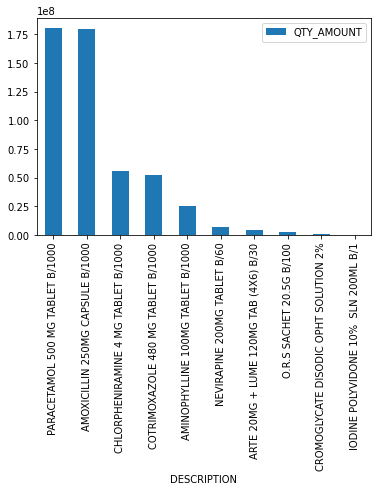

In [ ]:
table.plot(kind='bar');

Drug by quantity of amount consumed, the wo first drugs most consumed by quantinty of amount are PARACETAMOL 500 MG TABLET B/1000 in amount equal to 179,795,584, followed by
AMOXICILLIN 250MG CAPSULE B/1000 in amount equal to	179072549.

In [ ]:
table2 = pd.pivot_table(data_coded,index=['S_LEVEL3_NAME'],aggfunc={'QTY_AMOUNT':np.sum}).sort_values('QTY_AMOUNT', ascending = False)
table2

,QTY_AMOUNT
S_LEVEL3_NAME,
RW37,43640353
RW53,26470335
RW57,24511748
Rw52,24469164
RW54,23525113
RW31,23507961
RW55,20527361
RW26,20485268
RW51,19953250


District by quantity of amount consumed, the district consumed much quantinty of drug is RW37 in amount equal to 41,724,719.

to display quantity by district on map

In [ ]:
data_coded['Month'] = pd.DatetimeIndex(data_coded['YEAR_MONTH']).month

In [ ]:
data_coded.head()

,QTY_AMOUNT,DESCRIPTION,S_LEVEL3_NAME,SITE_NAME,YEAR_MONTH,Month
10,50,CROMOGLYCATE DISODIC OPHT SOLUTION 2%,RW42,Gakenke,2015-01-01,1
12,6700,AMOXICILLIN 250MG CAPSULE B/1000,RW42,Gakenke,2015-01-01,1
16,17609,PARACETAMOL 500 MG TABLET B/1000,RW24,Huye,2015-01-01,1
23,3083,PARACETAMOL 500 MG TABLET B/1000,RW53,Gatsibo,2015-01-01,1
30,117,NEVIRAPINE 200MG TABLET B/60,RW22,Gisagara,2015-01-01,1


In [ ]:
table4 = pd.pivot_table(data_coded,index=['Month'],aggfunc={'QTY_AMOUNT':np.mean}).sort_values('QTY_AMOUNT', ascending = False)
table4
#Number of inflation crisis by Country
# data_coded.groupby('Month').agg({'QTY_AMOUNT':'sum'}).sort_values('QTY_AMOUNT', ascending = False)

,QTY_AMOUNT
Month,
8,2732.814026
3,2671.917883
5,2659.023657
4,2620.310207
6,2529.109720
1,2438.208599
2,2345.457694
7,2172.094570
10,2106.681079


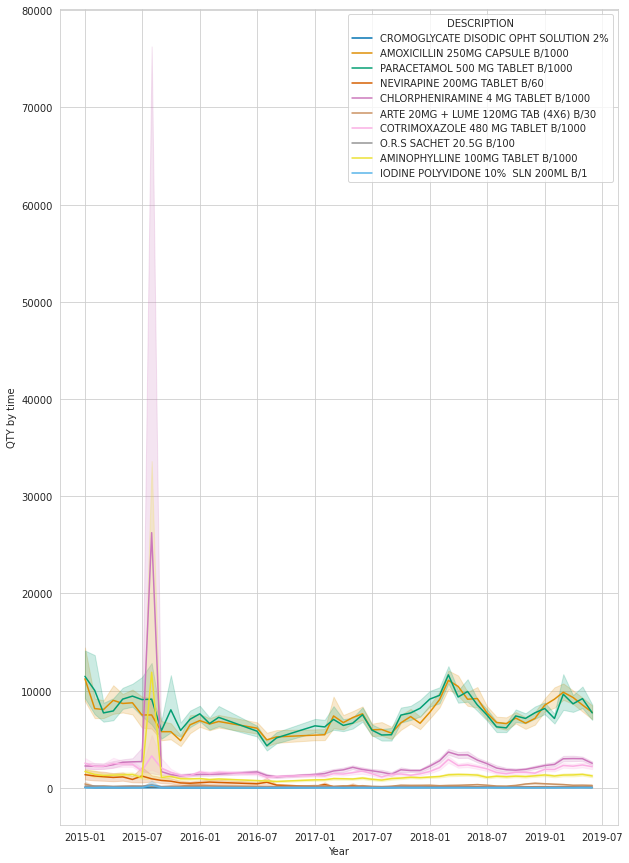

In [ ]:
#Let's have a look at amount by description
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
plt.figure(figsize = (10,15))
sns.lineplot(x = 'YEAR_MONTH', y = 'QTY_AMOUNT',hue='DESCRIPTION', data = data_coded, palette = 'colorblind')
plt.xlabel('Year')
plt.ylabel('QTY by time')
display()

the figure above shows the yearly pattern by amount of drugs consumed. PARACETAMOL 500 MG TABLET B/1000 and AMOXICILLIN 250MG CAPSULE B/1000 are highly consumed than others, And in August 2015 there is high pink of consumption in all drugs.

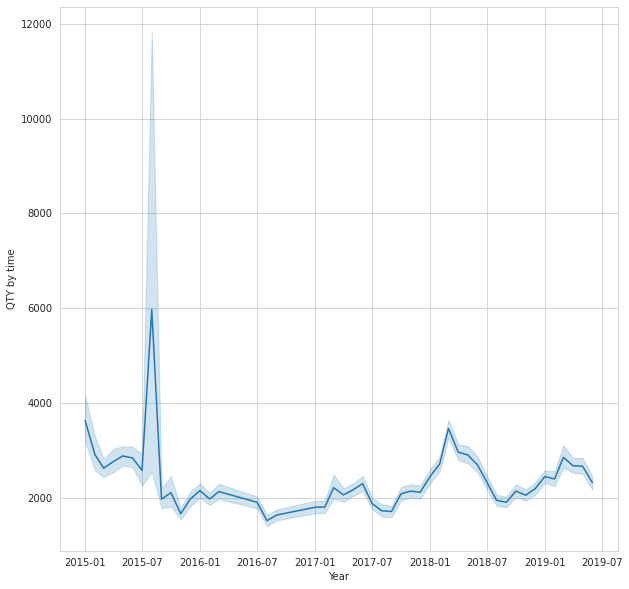

In [ ]:
#Let's have a look at amount by description
import seaborn as sns
sns.set_style('whitegrid')
plt.figure(figsize = (10,10))
sns.lineplot(x = 'YEAR_MONTH', y = 'QTY_AMOUNT', data = data_coded, palette = 'colorblind')
plt.xlabel('Year')
plt.ylabel('QTY by time')
display()

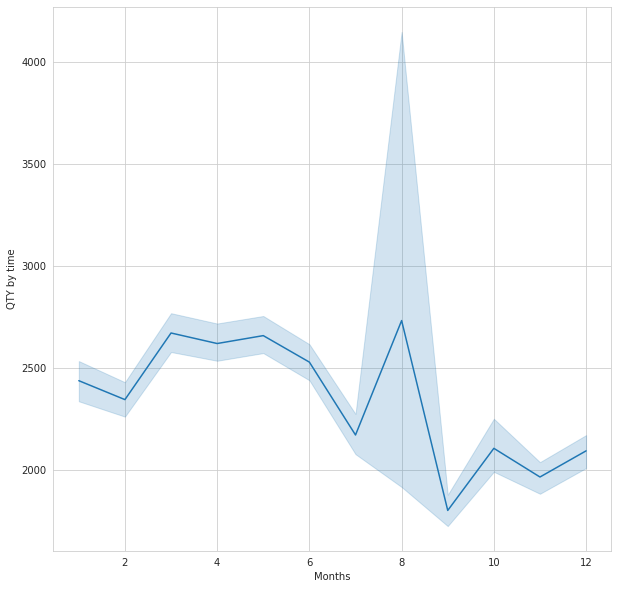

In [ ]:
#Let's have a look at amount by description
import seaborn as sns
sns.set_style('whitegrid')
plt.figure(figsize = (10,10))
sns.lineplot(x = 'Month', y = 'QTY_AMOUNT', data = data_coded, palette = 'colorblind')
plt.xlabel('Months')
plt.ylabel('QTY by time')
display()

AttributeError: ignored

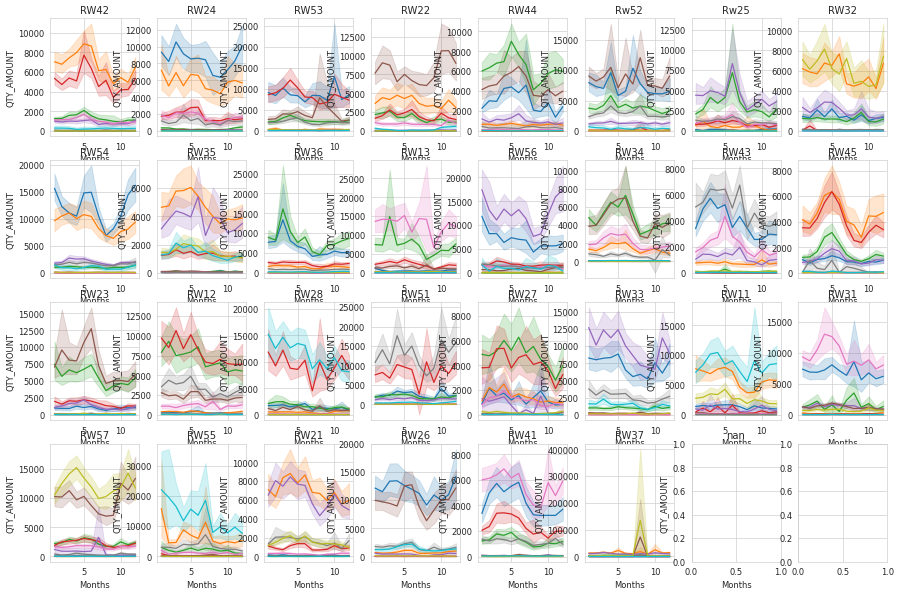

In [ ]:
#Exchange rates before and after independece
sns.set_style('whitegrid')
fig, axes = plt.subplots(ncols=8, nrows=4, figsize=(18,12), dpi= 60)
axes = axes.flatten()
for i, ax in zip(data_coded['S_LEVEL3_NAME'].unique(), axes):
  sns.lineplot(x = 'Month', y = 'QTY_AMOUNT', hue = 'DESCRIPTION', data = data_coded[data_coded['S_LEVEL3_NAME'] == i], ax = ax)
  ax.set_xlabel('Months')
  ax.set_ylabel('QTY_AMOUNT')
  ax.set_title('{}'.format(i))
  ax.get_legend().remove()
handles, labels = ax.get_legend_handles_labels()
fig.legend(handles, labels, loc=1)
fig.subplots_adjust(top=0.95)
for i in range(13,16):
  fig.delaxes(axes[i])
plt.tight_layout()

# cleaning for modeling

# Exploratory Analysis

In [ ]:
data = data_coded[['QTY_AMOUNT','DESCRIPTION','S_LEVEL3_NAME','YEAR_MONTH']]
data = data.rename(columns = {'QTY_AMOUNT': 'amount', 'DESCRIPTION': 'drugs','S_LEVEL3_NAME':'distr','YEAR_MONTH':'time'}, inplace = False)

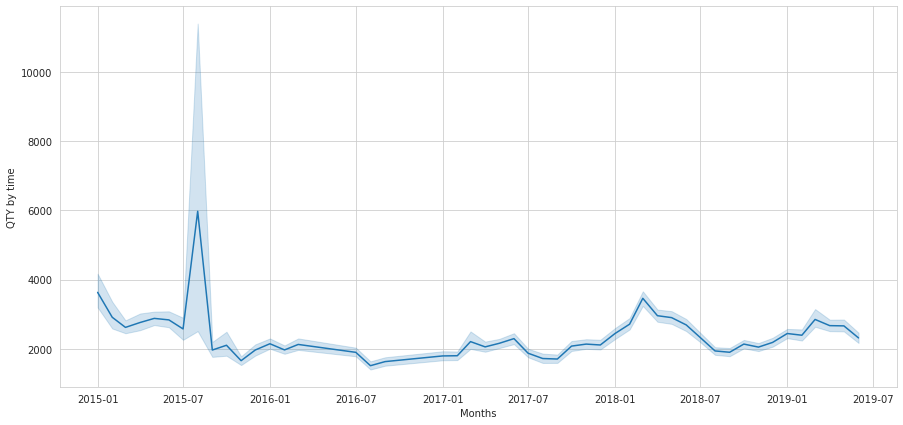

In [ ]:
#Let's have a look at amount by description
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
plt.figure(figsize = (15,7))
sns.lineplot(x = 'time', y = 'amount', data = data, palette = 'colorblind')
plt.xlabel('Months')
plt.ylabel('QTY by time')
display()

In [ ]:
# How many distrtict and drugss are there?
data.drugs.nunique(), data.distr.nunique()

(10, 30)

In [ ]:
# Time Range
data["YEAR_MONTH"].min(), data["YEAR_MONTH"].max()

(Timestamp('2015-01-01 00:00:00'), Timestamp('2019-06-01 00:00:00'))

In [ ]:
# How many items are in the in the district?
data.groupby(["S_LEVEL3_NAME"])["DESCRIPTION"].nunique()

S_LEVEL3_NAME
RW11    10
RW12    10
RW13    10
RW21    10
RW22    10
RW23    10
RW24    10
RW26    10
RW27    10
RW28    10
RW31    10
RW32    10
RW33    10
RW34    10
RW35    10
RW36    10
RW37    10
RW41    10
RW42    10
RW43    10
RW44    10
RW45    10
RW51    10
RW53    10
RW54    10
RW55    10
RW56    10
RW57    10
Rw25    10
Rw52    10
Name: DESCRIPTION, dtype: int64

In [ ]:
# data.groupby(["DESCRIPTION"]).agg({"QTY_AMOUNT": ["count","sum", "mean", "median", "std", "min", "max"]})

In [ ]:
data.head()

,amount,drugs,distr,time
10,50,CROMOGLYCATE DISODIC OPHT SOLUTION 2%,RW42,2015-01-01
12,6700,AMOXICILLIN 250MG CAPSULE B/1000,RW42,2015-01-01
16,17609,PARACETAMOL 500 MG TABLET B/1000,RW24,2015-01-01
23,3083,PARACETAMOL 500 MG TABLET B/1000,RW53,2015-01-01
30,117,NEVIRAPINE 200MG TABLET B/60,RW22,2015-01-01


In [ ]:
#dealing with outlier in training dataset
#dealing with outlier
low = .05
high = .95

# Step 1: compute 5% percentile and the 95% percentile of each column in the dataset
quantile_df = data.quantile([low, high])
quantile_df

print('Number of rows before outlier removal: {}'.format(data.shape))
#print("Dataset after removing outlier: ",x_df_advert.head())
#since outlier has been done on water, it does not be back in the list of columns and categorical data as well.
list_col = ['amount']

for column in list_col:

   data = data[(data[column] > quantile_df.loc[0.05, column]) & (data[column] < quantile_df.loc[0.95, column])]

print("Shape of the dataset without outlier: ",data.shape)

Number of rows before outlier removal: (192779, 4)
Shape of the dataset without outlier:  (172105, 4)


In [ ]:
data.head()

,amount,drugs,distr,time
10,50,CROMOGLYCATE DISODIC OPHT SOLUTION 2%,RW42,2015-01-01
12,6700,AMOXICILLIN 250MG CAPSULE B/1000,RW42,2015-01-01
23,3083,PARACETAMOL 500 MG TABLET B/1000,RW53,2015-01-01
30,117,NEVIRAPINE 200MG TABLET B/60,RW22,2015-01-01
35,6191,CHLORPHENIRAMINE 4 MG TABLET B/1000,RW44,2015-01-01


In [ ]:
# # one hot encode the covariate 'Country'
# one_hot_drug = pd.get_dummies(data['drugs'], prefix='drug')
# # one_hot_origin = pd.get_dummies(x['origin'], prefix='origin')
# one_hot_distr = pd.get_dummies(data['distr'], prefix='distr')
# # use pd.concat to join the new columns with your original dataframe
# data = pd.concat([data, one_hot_drug], axis=1)
# # x = pd.concat([x, one_hot_origin], axis=1)
# data = pd.concat([data, one_hot_distr], axis=1)


In [ ]:
# Dataframe must be sorted by date because of Time Series Split 
df = data.sort_values("time")

# to split test and train 
train = df.loc[(df["time"] < "2019-01-01"), :]
test = df.loc[(df["time"] >"2018-06-01"), :]
train.shape, test.shape

((149597, 4), (46159, 4))

# Train

In [ ]:
# adding year, month, and week column in a train dataframe
train['Month']=train.time.dt.month
train['year']=train.time.dt.year
train['week']=train.time.dt.week

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  after removing the

In [ ]:
# data summary of continuous variable
train.describe()

,amount,Month,year,week
count,167264.000000,167264.000000,167264.000000,167264.000000
mean,1382.968170,6.393330,2016.660256,26.305093
std,2220.490067,3.444911,1.170256,15.167378
min,3.000000,1.000000,2015.000000,1.000000
25%,45.000000,3.000000,2015.000000,13.000000
50%,285.000000,7.000000,2017.000000,26.000000
75%,1780.000000,9.000000,2018.000000,39.000000
max,10997.000000,12.000000,2018.000000,53.000000


In [ ]:
# first 5 observations of train set
train.head()

,amount,drugs,distr,time,Month,year,week
10,50,CROMOGLYCATE DISODIC OPHT SOLUTION 2%,RW42,2015-01-01,1,2015,1
40799,1717,PARACETAMOL 500 MG TABLET B/1000,RW35,2015-01-01,1,2015,1
40804,19,O.R.S SACHET 20.5G B/100,RW45,2015-01-01,1,2015,1
40805,1429,AMOXICILLIN 250MG CAPSULE B/1000,RW12,2015-01-01,1,2015,1
40808,27,ARTE 20MG + LUME 120MG TAB (4X6) B/30,RW33,2015-01-01,1,2015,1


# grouping data by specific variable

In [ ]:
# grouping total_amount by year, month, week, drugs, and districts
time_series_dd= train.groupby(['year','Month','week','drugs','distr']).agg(date=('time','first'),
                                                              total_amount=('amount',np.sum)
                                                              ).reset_index().sort_values('date')

In [ ]:
# first 5 observations of train set grouped with drugs and districts added.
time_series_dd.head()

,year,Month,week,drugs,distr,date,total_amount
0,2015,1,1,AMINOPHYLLINE 100MG TABLET B/1000,RW11,2015-01-01,1330
199,2015,1,1,IODINE POLYVIDONE 10% SLN 200ML B/1,RW55,2015-01-01,402
198,2015,1,1,IODINE POLYVIDONE 10% SLN 200ML B/1,RW54,2015-01-01,213
197,2015,1,1,IODINE POLYVIDONE 10% SLN 200ML B/1,RW53,2015-01-01,35
196,2015,1,1,IODINE POLYVIDONE 10% SLN 200ML B/1,RW51,2015-01-01,41


In [ ]:
time_series_dd.describe()

,year,Month,week,total_amount
count,12420.000000,12420.000000,12420.000000,12420.000000
mean,2016.574477,6.289694,25.968116,12946.198873
std,1.178699,3.446947,15.250881,14975.649282
min,2015.000000,1.000000,1.000000,7.000000
25%,2015.000000,3.000000,13.000000,771.000000
50%,2017.000000,7.000000,26.000000,6018.000000
75%,2018.000000,9.000000,39.000000,22395.000000
max,2018.000000,12.000000,53.000000,84288.000000


[]

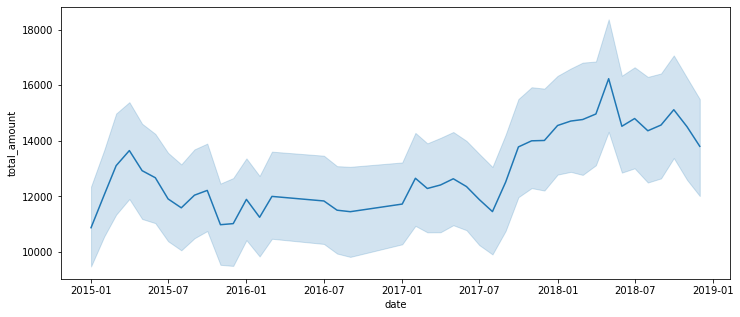

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(12,5))
sns.lineplot(x='date',y='total_amount',data=time_series_dd)
plt.plot()

In [ ]:
# saving to csv file
time_series_dd.to_csv('Time_series_d.csv')

# test set

In [ ]:
test['Month']=test.time.dt.month
test['year']=test.time.dt.year
test['week']=test.time.dt.week

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  This is separate from the ipykernel package so we 

In [ ]:
test.describe()

,amount,Month,year,week
count,52069.000000,52069.000000,52069.000000,52069.000000
mean,1497.190075,6.566652,2018.490023,24.705756
std,2333.032893,3.436470,0.499905,14.819596
min,3.000000,1.000000,2018.000000,1.000000
25%,41.000000,4.000000,2018.000000,14.000000
50%,293.000000,7.000000,2018.000000,26.000000
75%,2000.000000,10.000000,2019.000000,40.000000
max,10994.000000,12.000000,2019.000000,48.000000


# grouping data by specific variable

In [ ]:
time_series_test= test.groupby(['year','Month','week','drugs','distr']).agg(date=('time','first'),
                                                              total_amount=('amount',np.sum)
                                                              ).reset_index().sort_values('date')

In [ ]:
time_series_test.head()

,year,Month,week,drugs,distr,date,total_amount
0,2018,7,26,AMINOPHYLLINE 100MG TABLET B/1000,RW11,2018-07-01,1338
200,2018,7,26,IODINE POLYVIDONE 10% SLN 200ML B/1,RW53,2018-07-01,283
199,2018,7,26,IODINE POLYVIDONE 10% SLN 200ML B/1,RW51,2018-07-01,9
198,2018,7,26,IODINE POLYVIDONE 10% SLN 200ML B/1,RW45,2018-07-01,340
197,2018,7,26,IODINE POLYVIDONE 10% SLN 200ML B/1,RW44,2018-07-01,362


[]

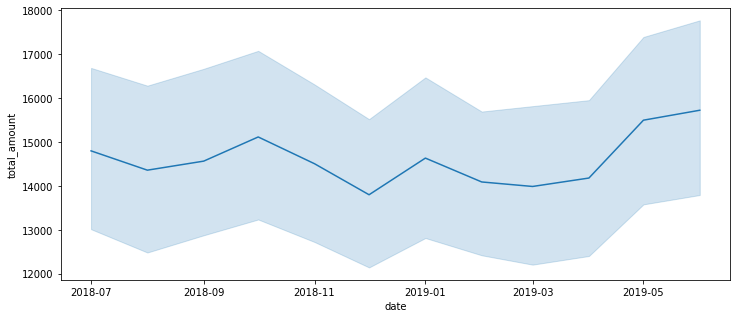

In [ ]:
plt.figure(figsize=(12,5))
sns.lineplot(x='date',y='total_amount',data=time_series_test)
plt.plot()

In [ ]:
# saving to csv file
time_series_test.to_csv('Time_series_test.csv')

# Model Building

Train

In [ ]:
#Add a trend component to our timeseres with drugs added
time_series_dd['trend']= range(time_series_dd.shape[0])
# change month column to category for onehot encoding process
time_series_dd['Month']=time_series_dd['Month'].astype('category')
time_series_dd['drugs']=time_series_dd['drugs'].astype('category')
time_series_dd['distr']=time_series_dd['distr'].astype('category')
# time_series_dd['time']=time_series_dd['time'].astype('datetime64[ns]')
# dropping columns not required in model
X= time_series_dd.drop(['year','week','date','total_amount'],axis=1)
# dummies and their columns names
names= pd.get_dummies(X).columns
X=pd.get_dummies(X).values
# dependent variable
y= time_series_dd.total_amount.values


Test

In [ ]:
#Add a trend component to our timeseres test
time_series_test['trend']= range(time_series_test.shape[0])
# change month column to category for onehot encoding process
time_series_test['Month']=time_series_test['Month'].astype('category')
time_series_test['drugs']=time_series_test['drugs'].astype('category')
time_series_test['distr']=time_series_test['distr'].astype('category')
# dropping columns not required in model
X_test= time_series_test.drop(['year','week','date','total_amount'],axis=1)
# dummies and their columns names
names_test= pd.get_dummies(X_test).columns
X_test=pd.get_dummies(X_test).values
# dependent variable
y_test= time_series_test.total_amount.values


Linear Ligression

In [ ]:
model = LinearRegression()
model.fit(X,y)
model.get_params()
model.coef_
# Prediction by model  train
prediction= model.predict(X)

from sklearn.metrics import mean_squared_error
mse_train_d=mean_squared_error(y,prediction)
print('Mean square error train: ',mse_train_d)

# test Prediction by model
pred_test= model.predict(X_test)
mse_test=mean_squared_error(y_test,pred_test)
print('Mean square error test: ', mse_test)
diff=mse_train_d-mse_test
print('Mean square error difference between train and test: ', diff)
if diff>0:
  print('model underfit')

Mean square error train:  143071875.74750414
Mean square error test:  203422942.0767409
Mean square error difference between train and test:  -60351066.329236746


In [ ]:
X_test.shape

(3581, 53)

In [ ]:
X.shape

(12503, 53)

In [ ]:
# model = LinearRegression()
# model.fit(X,y)
# model.get_params()
# model.coef_
# # Prediction by model  train
# prediction= model.predict(X)

# from sklearn.metrics import mean_squared_error
# mse_train_d=mean_squared_error(y,prediction)
# print('Mean square error train: ',mse_train_d)

# # test Prediction by model
# pred_test= model.predict(X_test)
# mse_test=mean_squared_error(y_test,pred_test)
# print('Mean square error test: ', mse_test)
# diff=mse_train_d-mse_test
# print('Mean square error difference between train and test: ', diff)
# # if diff>0:
# #   print('model underfit')

In [ ]:
# function to print feature importances (size of coefficients)
def print_sorted_feat_importance(weights, colnames):
    feature_weights = pd.Series(weights, index=colnames)
    feature_weights_sorted = feature_weights.apply(np.abs).sort_values(ascending=False)

    for name in feature_weights_sorted.index:
         print('{:23s}: {:.4f}'.format(name, feature_weights[name]))

weights=model.coef_
# print the coefficients in descending order (by absolute value)
X_colnames = names
print_sorted_feat_importance(weights, X_colnames)

Month_5                : 53129689480.7938
Month_4                : 53129689009.3911
Month_6                : 53129688424.9510
Month_3                : 53129688318.5971
Month_2                : 53129687191.5772
Month_10               : 53129686974.4496
Month_1                : 53129686474.4826
Month_7                : 53129686372.8900
Month_11               : 53129686048.2413
Month_9                : 53129685659.8917
Month_12               : 53129685554.0888
Month_8                : 53129684678.4832
drugs_IODINE POLYVIDONE 10%  SLN 200ML B/1: -20941109061.6845
drugs_CROMOGLYCATE DISODIC OPHT SOLUTION 2%: -20941108822.8583
drugs_O.R.S SACHET 20.5G B/100: -20941107681.5734
drugs_ARTE 20MG + LUME 120MG TAB (4X6) B/30: -20941106683.4103
drugs_NEVIRAPINE 200MG TABLET B/60: -20941106165.3165
drugs_AMINOPHYLLINE 100MG TABLET B/1000: -20941095663.9463
drugs_CHLORPHENIRAMINE 4 MG TABLET B/1000: -20941082627.6898
drugs_COTRIMOXAZOLE 480 MG TABLET B/1000: -20941079404.5015
drugs_AMOXICILLIN 250MG 

Test

In [ ]:
# test Prediction by model
pred_test= model.predict(X_test)

In [ ]:
# drugs and districts added
from sklearn.metrics import mean_squared_error
mse_test=mean_squared_error(y_test,pred_test)
print('Mean square error test: ', mse_test)
diff=mse_train_d-mse_test
print('Mean square error difference between train and test: ', diff)

Mean square error test:  203422942.0767409
Mean square error difference between train and test:  -60351066.329236746


In [ ]:
r_score_train=r2_score(y,prediction)
r_score_test=r2_score(y_test,pred_test)
print('r score of train {}'.format(r_score_train))
print('r score of test{}'.format(r_score_test))

r score of train 0.7458292903045978
r score of test0.7174733500393118


Figure

In [ ]:
# Add predictions to our timesries data
time_series_dd['prediction']=prediction

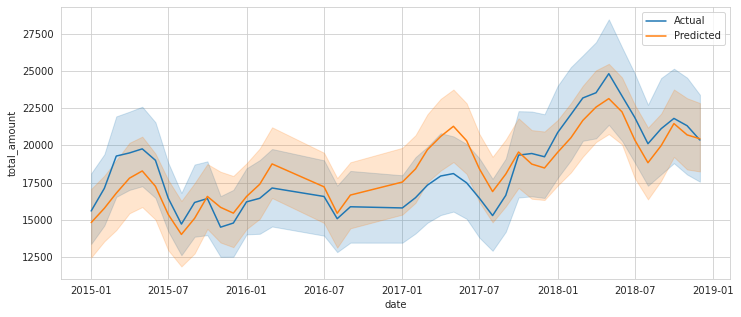

In [ ]:
plt.figure(figsize=(12,5))
sns.lineplot(x='date',y='total_amount',data=time_series_dd, label='Actual')
sns.lineplot(x='date',y='prediction',data=time_series_dd, label='Predicted')
plt.show()

In [ ]:
# Add predictions to our timesries data
time_series_test['prediction']=pred_test

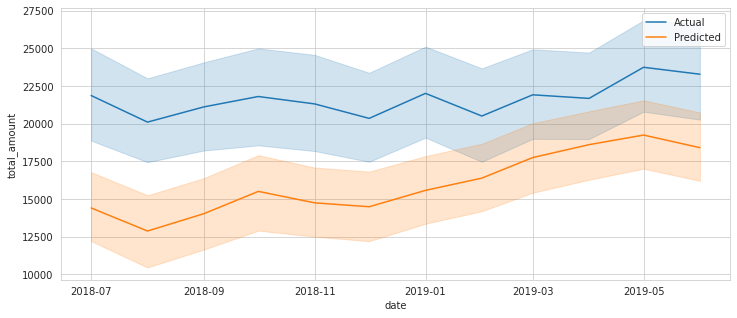

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(12,5))
sns.lineplot(x='date',y='total_amount',data=time_series_test, label='Actual')
sns.lineplot(x='date',y='prediction',data=time_series_test, label='Predicted')
plt.show()

In [ ]:
# Add predictions to our timesries data
time_series_dd['preds']=preds

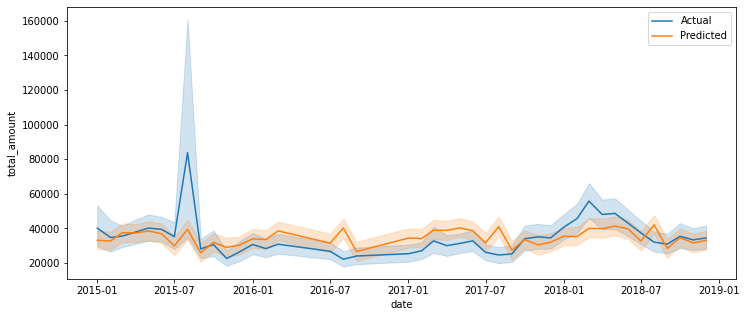

In [ ]:
# drugs and district added
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(12,5))
sns.lineplot(x='date',y='total_amount',data=time_series_dd, label='Actual')
sns.lineplot(x='date',y='preds',data=time_series_dd, label='Predicted')
plt.show()

Forecasting for Two months ahead

In [ ]:
## getting date range for forecasting period
max_date=time_series_test.date.max()
max_date

Timestamp('2019-06-01 00:00:00')

In [ ]:
# Maximum date is 5-Dec, we now forcast for two months based on weekly frequency

dates= pd.date_range('2019-07-01','2019-09-01',freq='W')

In [ ]:
# Make a dataframe
dates = pd.DataFrame({'date':pd.date_range('2019-07-01','2019-09-01',freq='W')})

In [ ]:
# time_series= data.groupby(['year','Month','week']).agg(date=('time','first'),
#                                                               total_amount=('amount',np.sum)
#                                                               ).reset_index().sort_values('date')

In [ ]:
# Merge timeseries df with dates df
time_series=pd.concat([time_series_test,dates],axis=0)

In [ ]:
time_series

,year,Month,week,drugs,distr,date,total_amount,trend,prediction
0,2018.0,7,26.0,AMINOPHYLLINE 100MG TABLET B/1000,RW11,2018-07-01,1338.0,0.0,4384.819527
203,2018.0,7,26.0,IODINE POLYVIDONE 10% SLN 200ML B/1,RW54,2018-07-01,353.0,1.0,-2477.645649
202,2018.0,7,26.0,IODINE POLYVIDONE 10% SLN 200ML B/1,RW53,2018-07-01,308.0,2.0,5723.881927
201,2018.0,7,26.0,IODINE POLYVIDONE 10% SLN 200ML B/1,RW51,2018-07-01,13.0,3.0,-6595.252163
200,2018.0,7,26.0,IODINE POLYVIDONE 10% SLN 200ML B/1,RW45,2018-07-01,352.0,4.0,210.703999
...,...,...,...,...,...,...,...,...,...
4,NaN,NaN,NaN,NaN,NaN,2019-08-04,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,2019-08-11,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,2019-08-18,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,2019-08-25,NaN,NaN,NaN


In [ ]:
time_series['trend']= range(time_series.shape[0])
time_series['Month']=time_series['date'].dt.month
time_series['Month']=time_series['Month'].astype('category')
time_series['Month']=time_series['drugs'].astype('category')
time_series['Month']=time_series['distr'].astype('category')

In [ ]:
# X= time_series.drop(['year','week','date','total_amount'],axis=1)
# names= pd.get_dummies(X).columns
# X=pd.get_dummies(X).values
# y= time_series.total_amount.values
# prediction=model.predict(X)
# time_series['prediction']=prediction

Forecast

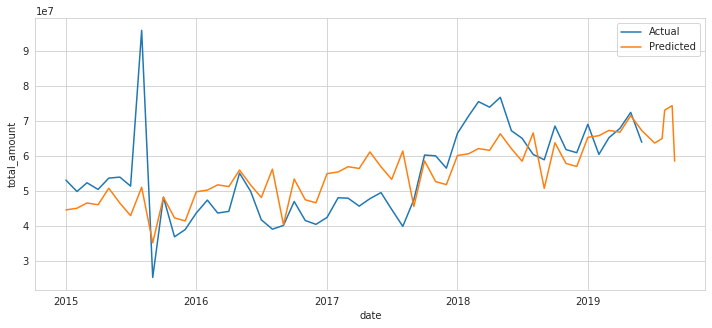

In [ ]:
plt.figure(figsize=(12,5))
sns.lineplot(x='date',y='total_amount',data=time_series, label='Actual')
sns.lineplot(x='date',y='prediction',data=time_series, label='Predicted')
plt.show()

# Random Forest

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression

regr = RandomForestRegressor(n_estimators=8000,max_depth=30, max_features=8, min_samples_leaf=4,random_state=0)
regr.fit(X, y)
y_pred1 = regr.predict(X)
y_pred2 = regr.predict(X_test)

MSE_train= mean_squared_error(y,y_pred1)
MSE_test= mean_squared_error(y_test,y_pred2)
print('mean square error of train {}'.format(MSE_train))
print('mean square error of test {}'.format(MSE_test))
r_score_train=r2_score(y,y_pred1)
r_score_test=r2_score(y_test,y_pred2)
print('r score of train {}'.format(r_score_train))
print('r score of test{}'.format(r_score_test))

mean square error of train 34097802.03301353
mean square error of test 79272859.02030964
r score of train 0.8479487368371303
r score of test0.6996301269735139


mean square error of train 8704937005.86893 <br>
mean square error of test 1714103173.7615318 <br>
r score of train 0.2783950355566909 <br>
r score of test0.5555227533679252

In [ ]:
#  870,493,700,5.86893-348,255,31.86416882

8670111474.004763

# after removing outlier with 10,000 n_estimators, 40 max depth, 10 max features, and 6 min samples leaf

mean square error of train 34825531.86416882 <br>
mean square error of test 80634343.4187691 <br>
r score of train 0.8447035939401972 <br>
r score of test0.6944713765392949

In [ ]:
time_series_dd['pred']=y_pred1

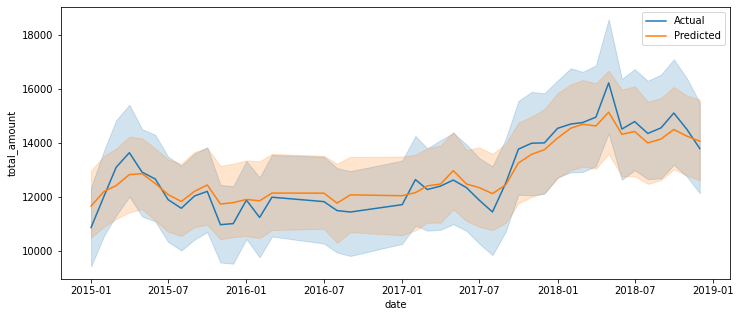

In [ ]:
plt.figure(figsize=(12,5))
sns.lineplot(x='date',y='total_amount',data=time_series_dd, label='Actual')
sns.lineplot(x='date',y='pred',data=time_series_dd, label='Predicted')
plt.show()

In [ ]:

reg = l2(0.08)

from keras import Sequential 
from keras.layers import Dense
def build_regressor():    
  regressor = Sequential()    
  regressor.add(Dense(units=300, input_dim=53, kernel_regularizer=reg))  
  regressor.add(Dense(units=300, activation='relu', kernel_regularizer=reg))
  regressor.add(Dense(units=150, activation='relu', kernel_regularizer=reg))
  regressor.add(Dense(units=150, activation='relu', kernel_regularizer=reg))
  regressor.add(Dense(units=75, activation='relu', kernel_regularizer=reg))
  regressor.add(Dense(units=75, activation='relu', kernel_regularizer=reg))
  regressor.add(Dense(units=50, activation='relu', kernel_regularizer=reg))
  regressor.add(Dense(units=50, activation='relu', kernel_regularizer=reg))
  regressor.add(Dense(units=25, activation='relu', kernel_regularizer=reg))
  regressor.add(Dense(units=25, activation='relu', kernel_regularizer=reg))
  regressor.add(Dense(units=1))  
  # regressor.add(Dense(y_train, activation='linear', kernel_regularizer=reg))
  regressor.compile(optimizer='adam', loss='mean_squared_error',  metrics=['mae','accuracy'])    
  return regressor

from keras.wrappers.scikit_learn import KerasRegressor 
regressor = KerasRegressor(build_fn=build_regressor, batch_size=64,epochs=1000)

regressor.fit(X,y)

y_pred= regressor.predict(X_test)
y_pred_tr=regressor.predict(X)

MSE_train= mean_squared_error(y,y_pred_tr)
MSE_test= mean_squared_error(y_test,y_pred)
print('mean square error of train {}'.format(MSE_train))
print('mean square error of test {}'.format(MSE_test))
r_score_train=r2_score(y,y_pred_tr)
r_score_test=r2_score(y_test,y_pred)
print('r score of train {}'.format(r_score_train))
print('r score of test{}'.format(r_score_test))


Epoch 1/1000
195/195 [==============================] - 2s 4ms/step - loss: 283208021.2245 - mae: 12336.9567 - accuracy: 0.0000e+00
Epoch 2/1000
195/195 [==============================] - 1s 4ms/step - loss: 253237459.4286 - mae: 12161.8403 - accuracy: 0.0000e+00
Epoch 3/1000
195/195 [==============================] - 1s 4ms/step - loss: 257661282.1224 - mae: 12327.1202 - accuracy: 0.0000e+00
Epoch 4/1000
195/195 [==============================] - 1s 4ms/step - loss: 259055689.3061 - mae: 12187.8785 - accuracy: 0.0000e+00
Epoch 5/1000
195/195 [==============================] - 1s 4ms/step - loss: 262553506.6939 - mae: 12328.1204 - accuracy: 0.0000e+00
Epoch 6/1000
195/195 [==============================] - 1s 4ms/step - loss: 255839482.2857 - mae: 12332.6505 - accuracy: 0.0000e+00
Epoch 7/1000
195/195 [==============================] - 1s 4ms/step - loss: 253248142.3673 - mae: 12180.5678 - accuracy: 0.0000e+00
Epoch 8/1000
195/195 [==============================] - 1s 4ms/step - loss: 

# with cleaned data from outlier

mean square error of train 44511609.823050395 <br>
mean square error of test 99966904.19585349 <br>
r score of train 0.8015107691558893 <br>
r score of test0.6212190818995629

mean square error of train 9633484567.723328 <br>
mean square error of test 1086953942.6840506 <br>
r score of train 0.20142210285147832 <br>
r score of test0.7181463151953198 <br>

# Add predictions to our timesries data
time_series_dd['preds']=preds

In [ ]:
time_series_dd['preds']=y_pred_tr

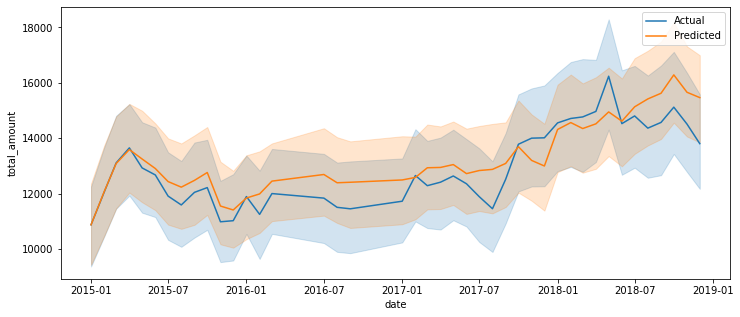

In [ ]:
# drugs and district added
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(12,5))
sns.lineplot(x='date',y='total_amount',data=time_series_dd, label='Actual')
sns.lineplot(x='date',y='preds',data=time_series_dd, label='Predicted')
plt.show()

In [ ]:
data['amount'].values

array([   50,  6700, 17609, ...,   176,  1050,  1500])

In [ ]:
# data.index.name = 'time'
data.set_index('time',inplace=True) 
data.head()


,amount,drugs,distr
time,,,
2015-01-01,50,CROMOGLYCATE DISODIC OPHT SOLUTION 2%,RW42
2015-01-01,6700,AMOXICILLIN 250MG CAPSULE B/1000,RW42
2015-01-01,17609,PARACETAMOL 500 MG TABLET B/1000,RW24
2015-01-01,3083,PARACETAMOL 500 MG TABLET B/1000,RW53
2015-01-01,117,NEVIRAPINE 200MG TABLET B/60,RW22


In [ ]:
dd=data.values

In [ ]:
dd[:,1:3]

array([['CROMOGLYCATE DISODIC OPHT SOLUTION 2%', 'RW42'],
       ['AMOXICILLIN 250MG CAPSULE B/1000', 'RW42'],
       ['PARACETAMOL 500 MG TABLET B/1000', 'RW24'],
       ...,
       ['O.R.S SACHET 20.5G B/100', 'Rw25'],
       ['AMINOPHYLLINE 100MG TABLET B/1000', 'RW27'],
       ['AMINOPHYLLINE 100MG TABLET B/1000', 'RW35']], dtype=object)

In [ ]:
print(np.shape(X))
print(np.shape(y))

(12529, 53)
(12529,)


In [ ]:
from pandas import read_csv
from pandas import DataFrame
from pandas import concat
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
 
# convert series to supervised learning
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
	n_vars = 1 if type(data) is list else data.shape[1]
	df = DataFrame(data)
	cols, names = list(), list()
	# input sequence (t-n, ... t-1)
	for i in range(n_in, 0, -1):
		cols.append(df.shift(i))
		names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
	# forecast sequence (t, t+1, ... t+n)
	for i in range(0, n_out):
		cols.append(df.shift(-i))
		if i == 0:
			names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
		else:
			names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
	# put it all together
	agg = concat(cols, axis=1)
	agg.columns = names
	# drop rows with NaN values
	if dropnan:
		agg.dropna(inplace=True)
	return agg
 
# load dataset
# dataset = read_csv('pollution.csv', header=0, index_col=0)
values = data.values
# integer encode direction
encoder = LabelEncoder()
values[:,1] = encoder.fit_transform(values[:,1].astype(str))
values[:,2] = encoder.fit_transform(values[:,2].astype(str))
# ensure all data is float
values = values.astype('float32')
# normalize features
scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(values)
# frame as supervised learning
reframed = series_to_supervised(scaled, 1, 1)
# drop columns we don't want to predict
reframed.drop(reframed.columns[[4,5]], axis=1, inplace=True)
print(reframed.head())

   var1(t-1)  var2(t-1)  var3(t-1)   var1(t)
1   0.000005   0.555556   0.600000  0.000720
2   0.000720   0.111111   0.600000  0.001891
3   0.001891   1.000000   0.200000  0.000331
4   0.000331   1.000000   0.766667  0.000013
5   0.000013   0.777778   0.133333  0.000665


In [ ]:
# split into train and test sets
values = reframed.values
n_train_hours = (365 * 24)*24
train = values[:n_train_hours, :]
test = values[n_train_hours:, :]
# split into input and outputs
train_X, train_y = train[:, :-1], train[:, -1]
test_X, test_y = test[:, :-1], test[:, -1]
# reshape input to be 3D [samples, timesteps, features]
train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))
print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)

(210240, 1, 3) (210240,) (4788, 1, 3) (4788,)


Epoch 1/200
2920/2920 - 6s - loss: 5.6102e-04 - val_loss: 6.0924e-04
Epoch 2/200
2920/2920 - 4s - loss: 4.9792e-04 - val_loss: 3.1819e-04
Epoch 3/200
2920/2920 - 4s - loss: 4.7359e-04 - val_loss: 3.5725e-04
Epoch 4/200
2920/2920 - 4s - loss: 4.4076e-04 - val_loss: 2.7502e-04
Epoch 5/200
2920/2920 - 4s - loss: 4.2864e-04 - val_loss: 2.8530e-04
Epoch 6/200
2920/2920 - 4s - loss: 4.1184e-04 - val_loss: 3.0834e-04
Epoch 7/200
2920/2920 - 4s - loss: 4.0716e-04 - val_loss: 3.0817e-04
Epoch 8/200
2920/2920 - 4s - loss: 3.6765e-04 - val_loss: 3.8589e-04
Epoch 9/200
2920/2920 - 4s - loss: 3.5873e-04 - val_loss: 4.1480e-04
Epoch 10/200
2920/2920 - 4s - loss: 3.3972e-04 - val_loss: 2.9821e-04
Epoch 11/200
2920/2920 - 4s - loss: 3.2977e-04 - val_loss: 2.8864e-04
Epoch 12/200
2920/2920 - 4s - loss: 3.2997e-04 - val_loss: 2.7762e-04
Epoch 13/200
2920/2920 - 4s - loss: 3.1518e-04 - val_loss: 2.9469e-04
Epoch 14/200
2920/2920 - 4s - loss: 3.1378e-04 - val_loss: 3.2593e-04
Epoch 15/200
2920/2920 - 4s -

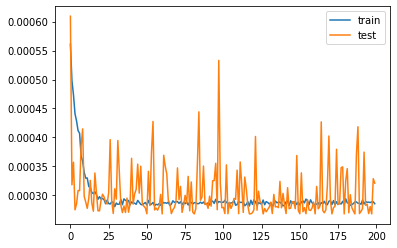

In [ ]:

# design network
model = Sequential()
model.add(LSTM(50, input_shape=(train_X.shape[1], train_X.shape[2])))
model.add(Dense(1))
model.compile(loss='mae', optimizer='adam')
# fit network
history = model.fit(train_X, train_y, epochs=200, batch_size=72, validation_data=(test_X, test_y), verbose=2, shuffle=False)
# plot history
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()

In [ ]:
# make a prediction
yhat = model.predict(test_X)
test_X = test_X.reshape((test_X.shape[0], test_X.shape[2]))
# invert scaling for forecast
inv_yhat = concatenate((yhat, test_X[:, 1:]), axis=1)
inv_yhat = scaler.inverse_transform(inv_yhat)
inv_yhat = inv_yhat[:,0]
# invert scaling for actual
test_y = test_y.reshape((len(test_y), 1))
inv_y = concatenate((test_y, test_X[:, 1:]), axis=1)
inv_y = scaler.inverse_transform(inv_y)
inv_y = inv_y[:,0]
# calculate RMSE
rmse = sqrt(mean_squared_error(inv_y, inv_yhat))
print('Test RMSE: %.3f' % rmse)

Test RMSE: 5427.080


In [ ]:
inv_y

array([  140.,   143., 13101., ...,   176.,  1050.,  1500.], dtype=float32)

In [ ]:
# train_X
# y_pred = model.predict(train_X)
# make a prediction
y_pred = model.predict(train_X)
test_X = test_X.reshape((train_X.shape[0], train_X.shape[2]))
# invert scaling for forecast
inv_y_pred = concatenate((y_pred, train_X[:, 1:]), axis=1)
inv_y_pred = scaler.inverse_transform(inv_y_pred)
inv_y_pred = inv_y_pred[:,0]
# invert scaling for actual
train_y = train_y.reshape((len(train_y), 1))
inv_train_y = concatenate((train_y, train_X[:, 1:]), axis=1)
inv_y = scaler.inverse_transform(inv_train_y)
inv_train_y = inv_train_y[:,0]
# calculate RMSE
rmse = sqrt(mean_squared_error(inv_train_y, inv_y_pred))
print('Test RMSE: %.3f' % rmse)


ValueError: ignored

In [ ]:
MSE_train= sqrt(mean_squared_error(inv_y,inv_yhat))
MSE_test= sqrt(mean_squared_error(test_y,inv_y))
print('mean square error of train {}'.format(MSE_train))
print('mean square error of test {}'.format(MSE_test))
r_score_train=r2_score(inv_y,inv_yhat)
# r_score_test=r2_score(test_y,inv_y)
print('r score of train {}'.format(r_score_train))
# print('r score of test{}'.format(r_score_test))

mean square error of train 5427.079877798004
mean square error of test 5991.109413122081
r score of train -0.003316215849708426


In [ ]:
reframed.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 215028 entries, 1 to 215028
Data columns (total 6 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   var1(t-1)  215028 non-null  float32
 1   var2(t-1)  215028 non-null  float32
 2   var3(t-1)  215028 non-null  float32
 3   var1(t)    215028 non-null  float32
 4   var2(t)    215028 non-null  float32
 5   var3(t)    215028 non-null  float32
dtypes: float32(6)
memory usage: 6.6 MB


# Random Forest second approach

In [ ]:
# !pip install calendar

In [ ]:
from statsmodels.tsa.stattools import adfuller
from numpy import log
import pandas as pd
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestRegressor
from pandas import DataFrame
import numpy as np
from datetime import timedelta
# import calender

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
df=data[['time','amount']]
df.head()

,time,amount
10,2015-01-01,50
12,2015-01-01,6700
16,2015-01-01,17609
23,2015-01-01,3083
30,2015-01-01,117


In [ ]:
# create lag variable
dataframe = DataFrame()
for i in range(12, 0, -1):
   dataframe['t-' + str(i)] = df.amount.shift(i)
final_data = pd.concat([df, dataframe], axis=1)
final_data.dropna(inplace=True)
final_data.head()

,time,amount,t-12,t-11,t-10,t-9,t-8,t-7,t-6,t-5,t-4,t-3,t-2,t-1
114,2015-01-01,27000,50.0,6700.0,17609.0,3083.0,117.0,6191.0,11000.0,100.0,1000.0,73885.0,6.0,1700.0
124,2015-01-01,1,6700.0,17609.0,3083.0,117.0,6191.0,11000.0,100.0,1000.0,73885.0,6.0,1700.0,27000.0
132,2015-01-01,22000,17609.0,3083.0,117.0,6191.0,11000.0,100.0,1000.0,73885.0,6.0,1700.0,27000.0,1.0
135,2015-01-01,681,3083.0,117.0,6191.0,11000.0,100.0,1000.0,73885.0,6.0,1700.0,27000.0,1.0,22000.0
150,2015-01-01,25000,117.0,6191.0,11000.0,100.0,1000.0,73885.0,6.0,1700.0,27000.0,1.0,22000.0,681.0


In [ ]:
# add seasonal variable
final_data['time'] = pd.to_datetime(final_data['time'], format='%Y-%m-%d')
final_data['month'] = final_data['time'].dt.month

In [ ]:
dummy = pd.get_dummies(final_data['month'])
final_data = pd.concat([final_data, dummy], axis=1)

Train the model:
We will take the most recent 6 months data as the test dataset and the rest of the data as the training dataset.

In [ ]:
finaldf = final_data.drop(['time'], axis=1)
finaldf = finaldf.reset_index(drop=True)
test_length=6
end_point = len(finaldf)
x = end_point - test_length
finaldf_train = finaldf.loc[:x - 1, :]
finaldf_test = finaldf.loc[x:, :]
finaldf_test_x = finaldf_test.loc[:, finaldf_test.columns != 'amount']
finaldf_test_y = finaldf_test['amount']
finaldf_train_x = finaldf_train.loc[:, finaldf_train.columns != 'amount']
finaldf_train_y = finaldf_train['amount']
print("Starting model train..")
rfe = RFE(RandomForestRegressor(n_estimators=100, random_state=1), 4)
fit = rfe.fit(finaldf_train_x, finaldf_train_y)
y_pred = fit.predict(finaldf_test_x)

Starting model train..


In [ ]:
# Evaluating the Algorithm:
y_true = np.array(finaldf_test_ y['amount'])
sumvalue=np.sum(y_true)
mape=np.sum(np.abs((y_true - y_pred)))/sumvalue*100
accuracy=100-mape
print('Accuracy:', round(accuracy,2),'%.')

# Xboost

In [ ]:
# Dataframe must be sorted by date because of Time Series Split 
df = data.sort_values("time")

# to split test and train 
trai = df.loc[(df["time"] < "2019-01-01"), :]
tes = df.loc[(df["time"] >"2018-06-01"), :]
trai.shape, tes.shape

((186401, 4), (57870, 4))

In [ ]:
print(trai.head())
print(tes.head())

       amount                                  drugs distr       time
10       50.0  CROMOGLYCATE DISODIC OPHT SOLUTION 2%  RW42 2015-01-01
60623    60.0  CROMOGLYCATE DISODIC OPHT SOLUTION 2%  Rw52 2015-01-01
60642     3.0   IODINE POLYVIDONE 10%  SLN 200ML B/1  RW54 2015-01-01
60647   425.0     COTRIMOXAZOLE 480 MG TABLET B/1000  RW45 2015-01-01
60648  2066.0       PARACETAMOL 500 MG TABLET B/1000  RW45 2015-01-01
       amount                                  drugs distr       time
98939  9982.0       AMOXICILLIN 250MG CAPSULE B/1000  RW41 2018-07-01
98941   172.0           NEVIRAPINE 200MG TABLET B/60  RW56 2018-07-01
99012  8000.0       PARACETAMOL 500 MG TABLET B/1000  RW28 2018-07-01
98963    26.0  CROMOGLYCATE DISODIC OPHT SOLUTION 2%  RW26 2018-07-01
98980  5000.0    CHLORPHENIRAMINE 4 MG TABLET B/1000  RW24 2018-07-01


In [ ]:
#Add a trend component to our timeseres test
# time_series_test['trend']= range(time_series_test.shape[0])
# change month column to category for onehot encoding process
# train['Month']=train['Month'].astype('category')
trai['drugs']=trai['drugs'].astype('category')
trai['distr']=trai['distr'].astype('category')
# adding year, month, and week column in a train dataframe
# trai['year']=trai.time.dt.year
# trai['Month']=trai.time.dt.month
# trai['week']=train.time.dt.week
# dropping columns not required in model
# trai= trai.drop(['time'],axis=1)
# dummies and their columns names
# names= pd.get_dummies(X_trai).columns
# X_trai=pd.get_dummies(X_trai).values
# dependent variable
# y_trai= trai.amount.values
trai=trai['amount'].tolist()


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
#Add a trend component to our timeseres test
# time_series_test['trend']= range(time_series_test.shape[0])
# change month column to category for onehot encoding process
# train['Month']=train['Month'].astype('category')
# tes['drugs']=tes['drugs'].astype('category')
# tes['distr']=tes['distr'].astype('category')

# dropping columns not required in model
# X_tes= tes.drop(['amount','time'],axis=1)
# dummies and their columns names
# names= pd.get_dummies(X_tes).columns
# X_tes=pd.get_dummies(X_tes).values
# dependent variable
# y_tes= tes.amount.values
tes=tes['amount'].tolist()

In [ ]:
from xgboost import XGBRegressor

In [ ]:
reg=XGBRegressor(n_estimator=500, learning_rate=0.01)
reg.fit(X_trai, y_trai, eval_set=[(X_trai, y_trai), (X_tes, y_tes)],eval_metric='mae')

[18:30:07] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBoostError: ignored

In [ ]:
train

In [ ]:
import numpy as np
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Embedding
from keras.layers import LSTM
def to_sequences(seq_size,obs):
  x=[]
  y=[]
  for i in range(len(obs)-seq_size-1):
    window=obs[i:(i+seq_size)]
    after_window=obs[i+seq_size]
    window= [[x] for x in window]
    x.append(window)
    y.append(after_window)
  return np.array(x), np.array(y)
seq_size=10
x_train, y_train= to_sequences(seq_size,trai)
x_test, y_test= to_sequences(seq_size,tes)
print("shape of training set: {}".format(x_train.shape))
print("shape of test set: {}".format(x_test.shape))

NameError: ignored

In [ ]:
y_train.shape

(186390,)

In [ ]:
# x_test[0]

In [ ]:
from keras.callbacks import EarlyStopping
model=Sequential()
model.add(LSTM(512, dropout=0.2,recurrent_dropout=0.2, input_dim=1))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
# monitor= EarlyStopping(monitor='val_loss', min_delta=0.003, patience=5, verbose=1, mode='auto')
# validation_data=(x_train,y_test),callbacks=[monitor],verbose=2,
history=model.fit(x_train,y_train, batch_size=256,epochs=20)

NameError: ignored

In [ ]:
y_pred = model.predict(x_train)

MSE_train= sqrt(mean_squared_error(y_train,y_pred))
# MSE_test= sqrt(mean_squared_error(test_y,inv_y))
print('mean square error of train {}'.format(MSE_train))
# print('mean square error of test {}'.format(MSE_test))
r_score_train=r2_score(y_train,y_pred)
# r_score_test=r2_score(test_y,inv_y)
print('r score of train {}'.format(r_score_train))
# print('r score of test{}'.format(r_score_test))

mean square error of train 24668.34613195881
r score of train -0.006220886302719775


In [ ]:
y_pred_t = model.predict(x_test)

MSE_test= sqrt(mean_squared_error(y_test,y_pred_t))
# MSE_test= sqrt(mean_squared_error(test_y,inv_y))
print('mean square error of train {}'.format(MSE_test))
# print('mean square error of test {}'.format(MSE_test))
r_score_test=r2_score(y_test,y_pred_t)
# r_score_test=r2_score(test_y,inv_y)
print('r score of train {}'.format(r_score_test))
# print('r score of test{}'.format(r_score_test))

mean square error of train 5662.265105175749
r score of train -0.13006406042592178


In [ ]:
# plot history
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()

# LSTM

https://www.youtube.com/watch?v=4FmVIpcwl4k&list=RDCMUCwBs8TLOogwyGd0GxHCp-Dw&start_radio=1&rv=4FmVIpcwl4k&t=108&t=108

In [ ]:
data.head()

,amount,drugs,distr,time
10,50,CROMOGLYCATE DISODIC OPHT SOLUTION 2%,RW42,2015-01-01
12,6700,AMOXICILLIN 250MG CAPSULE B/1000,RW42,2015-01-01
16,17609,PARACETAMOL 500 MG TABLET B/1000,RW24,2015-01-01
23,3083,PARACETAMOL 500 MG TABLET B/1000,RW53,2015-01-01
30,117,NEVIRAPINE 200MG TABLET B/60,RW22,2015-01-01


In [ ]:
#dealing with outlier in training dataset
#dealing with outlier
low = .05
high = .95

# Step 1: compute 5% percentile and the 95% percentile of each column in the dataset
quantile_df = data.quantile([low, high])
quantile_df

print('Number of rows before outlier removal: {}'.format(data.shape[0]))
#print("Dataset after removing outlier: ",x_df_advert.head())
#since outlier has been done on water, it does not be back in the list of columns and categorical data as well.
list_col = ['amount']

for column in list_col:

   data = data[(data[column] > quantile_df.loc[0.05, column]) & (data[column] < quantile_df.loc[0.95, column])]

print("Shape of the dataset without outlier: ",data.shape)

Number of rows before outlier removal: 215029
Shape of the dataset without outlier:  (192779, 4)


In [ ]:
data.head()

,amount,drugs,distr,time
10,50,CROMOGLYCATE DISODIC OPHT SOLUTION 2%,RW42,2015-01-01
12,6700,AMOXICILLIN 250MG CAPSULE B/1000,RW42,2015-01-01
23,3083,PARACETAMOL 500 MG TABLET B/1000,RW53,2015-01-01
30,117,NEVIRAPINE 200MG TABLET B/60,RW22,2015-01-01
35,6191,CHLORPHENIRAMINE 4 MG TABLET B/1000,RW44,2015-01-01


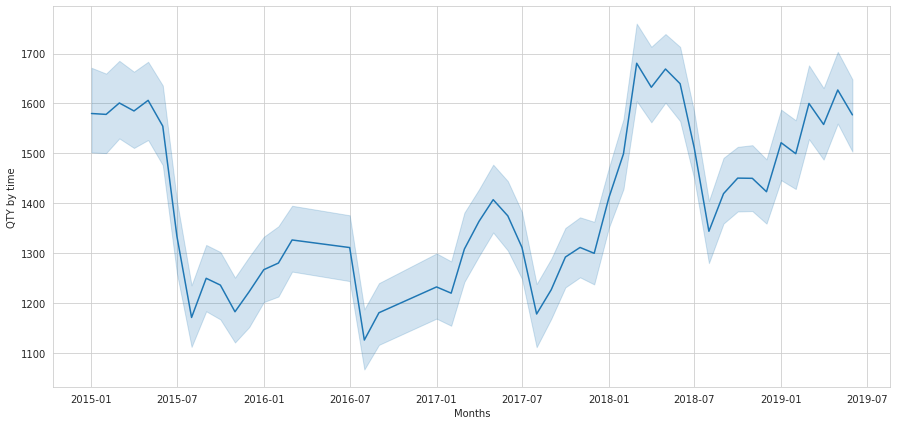

In [ ]:
#Let's have a look at amount by description
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
plt.figure(figsize = (15,7))
sns.lineplot(x = 'time', y = 'amount', data = data, palette = 'colorblind')
plt.xlabel('Months')
plt.ylabel('QTY by time')
display()

In [ ]:
# one hot encode the covariate 'Country'
one_hot_drug = pd.get_dummies(data['drugs'], prefix='drug')
# one_hot_origin = pd.get_dummies(x['origin'], prefix='origin')
one_hot_distr = pd.get_dummies(data['distr'], prefix='distr')
# use pd.concat to join the new columns with your original dataframe
data = pd.concat([data, one_hot_drug], axis=1)
# x = pd.concat([x, one_hot_origin], axis=1)
data = pd.concat([data, one_hot_distr], axis=1)

In [ ]:
data.head()

,amount,drugs,distr,time,drug_AMINOPHYLLINE 100MG TABLET B/1000,drug_AMOXICILLIN 250MG CAPSULE B/1000,drug_ARTE 20MG + LUME 120MG TAB (4X6) B/30,drug_CHLORPHENIRAMINE 4 MG TABLET B/1000,drug_COTRIMOXAZOLE 480 MG TABLET B/1000,drug_CROMOGLYCATE DISODIC OPHT SOLUTION 2%,drug_IODINE POLYVIDONE 10% SLN 200ML B/1,drug_NEVIRAPINE 200MG TABLET B/60,drug_O.R.S SACHET 20.5G B/100,drug_PARACETAMOL 500 MG TABLET B/1000,distr_RW11,distr_RW12,distr_RW13,distr_RW21,distr_RW22,distr_RW23,distr_RW24,distr_RW26,distr_RW27,distr_RW28,distr_RW31,distr_RW32,distr_RW33,distr_RW34,distr_RW35,distr_RW36,distr_RW37,distr_RW41,distr_RW42,distr_RW43,distr_RW44,distr_RW45,distr_RW51,distr_RW53,distr_RW54,distr_RW55,distr_RW56,distr_RW57,distr_Rw25,distr_Rw52
10,50,CROMOGLYCATE DISODIC OPHT SOLUTION 2%,RW42,2015-01-01,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
12,6700,AMOXICILLIN 250MG CAPSULE B/1000,RW42,2015-01-01,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
23,3083,PARACETAMOL 500 MG TABLET B/1000,RW53,2015-01-01,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
30,117,NEVIRAPINE 200MG TABLET B/60,RW22,2015-01-01,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
35,6191,CHLORPHENIRAMINE 4 MG TABLET B/1000,RW44,2015-01-01,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0


In [ ]:
# now drop the drugs and dirtrict columns as we have arleady created their dummies
data.drop(['drugs'], axis=1, inplace=True)
data.drop(['distr'], axis=1, inplace=True)
data.drop(['time'], axis=1, inplace=True)
data.head()

,amount,drug_AMINOPHYLLINE 100MG TABLET B/1000,drug_AMOXICILLIN 250MG CAPSULE B/1000,drug_ARTE 20MG + LUME 120MG TAB (4X6) B/30,drug_CHLORPHENIRAMINE 4 MG TABLET B/1000,drug_COTRIMOXAZOLE 480 MG TABLET B/1000,drug_CROMOGLYCATE DISODIC OPHT SOLUTION 2%,drug_IODINE POLYVIDONE 10% SLN 200ML B/1,drug_NEVIRAPINE 200MG TABLET B/60,drug_O.R.S SACHET 20.5G B/100,drug_PARACETAMOL 500 MG TABLET B/1000,distr_RW11,distr_RW12,distr_RW13,distr_RW21,distr_RW22,distr_RW23,distr_RW24,distr_RW26,distr_RW27,distr_RW28,distr_RW31,distr_RW32,distr_RW33,distr_RW34,distr_RW35,distr_RW36,distr_RW37,distr_RW41,distr_RW42,distr_RW43,distr_RW44,distr_RW45,distr_RW51,distr_RW53,distr_RW54,distr_RW55,distr_RW56,distr_RW57,distr_Rw25,distr_Rw52
10,50,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
12,6700,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
23,3083,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
30,117,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
35,6191,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0


In [ ]:
scalar=MinMaxScaler()
data_scaled=scalar.fit_transform(data)

In [ ]:
data_scaled

array([[0.00427506, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.60915045, 0.        , 1.        , ..., 0.        , 0.        ,
        0.        ],
       [0.28015281, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.01573586, 0.        , 0.        , ..., 0.        , 1.        ,
        0.        ],
       [0.09523376, 1.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.13616518, 1.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [ ]:
features=data_scaled
targets=data_scaled[:,0]

In [ ]:
TimeseriesGenerator(features,targets, length=4,sampling_rate=1,batch_size=1)[0]

(array([[[0.00427506, 0.        , 0.        , 0.        , 0.        ,
          0.        , 1.        , 0.        , 0.        , 0.        ,
          0.        , 0.        , 0.        , 0.        , 0.        ,
          0.        , 0.        , 0.        , 0.        , 0.        ,
          0.        , 0.        , 0.        , 0.        , 0.        ,
          0.        , 0.        , 0.        , 0.        , 1.        ,
          0.        , 0.        , 0.        , 0.        , 0.        ,
          0.        , 0.        , 0.        , 0.        , 0.        ,
          0.        ],
         [0.60915045, 0.        , 1.        , 0.        , 0.        ,
          0.        , 0.        , 0.        , 0.        , 0.        ,
          0.        , 0.        , 0.        , 0.        , 0.        ,
          0.        , 0.        , 0.        , 0.        , 0.        ,
          0.        , 0.        , 0.        , 0.        , 0.        ,
          0.        , 0.        , 0.        , 0.        , 1.       

In [ ]:
x_train, x_test, y_train, y_test=train_test_split(features, targets, test_size=0.20, random_state=123, shuffle=False)

In [ ]:
print('x train shape: ', x_train.shape)
print('x test shape: ', x_test.shape)
print('y train shape: ', y_train.shape)
print('y test shape: ', y_test.shape)

x train shape:  (154223, 41)
x test shape:  (38556, 41)
y train shape:  (154223,)
y test shape:  (38556,)


In [ ]:
win_length=360
batch_size=128
num_features=41
train_generator=TimeseriesGenerator(x_train,y_train, length=win_length, sampling_rate=1,batch_size=batch_size)
test_generator=TimeseriesGenerator(x_test,y_test, length=win_length, sampling_rate=1,batch_size=batch_size)

In [ ]:
# train_generator[0]

In [ ]:
model=Sequential()
model.add(LSTM(128, input_shape= (win_length, num_features), return_sequences=True))
model.add(tf.keras.layers.LeakyReLU(alpha=0.05))
model.add(LSTM(128, return_sequences=True))
model.add(tf.keras.layers.LeakyReLU(alpha=0.05))
model.add(tf.keras.layers.Dropout(0.3))
model.add(LSTM(64, return_sequences=False))
model.add(tf.keras.layers.Dropout(0.3))
model.add(tf.keras.layers.Dense(1))



In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 360, 128)          87040     
_________________________________________________________________
module_wrapper (ModuleWrappe (None, 360, 128)          0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 360, 128)          131584    
_________________________________________________________________
module_wrapper_1 (ModuleWrap (None, 360, 128)          0         
_________________________________________________________________
module_wrapper_2 (ModuleWrap (None, 360, 128)          0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 64)                49408     
_________________________________________________________________
module_wrapper_3 (ModuleWrap (None, 64)                0

In [ ]:
early_stopping=tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                                patience=3,mode='min')
model.compile(loss=tf.losses.MeanSquaredError(),
              optimizer=tf.optimizers.Adam(learning_rate=0.005),
              metrics=[tf.metrics.MeanAbsoluteError()])

In [ ]:
history=model.fit_generator(train_generator, epochs=20,
                            validation_data=test_generator,
                            shuffle=False, callbacks=[early_stopping])

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1915: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/20
1203/1203 [==============================] - 123s 83ms/step - loss: 0.0418 - mean_absolute_error: 0.1528 - val_loss: 0.0479 - val_mean_absolute_error: 0.1448
Epoch 2/20
1203/1203 [==============================] - 99s 83ms/step - loss: 0.0409 - mean_absolute_error: 0.1462 - val_loss: 0.0478 - val_mean_absolute_error: 0.1457
Epoch 3/20
1203/1203 [==============================] - 98s 81ms/step - loss: 0.0408 - mean_absolute_error: 0.1463 - val_loss: 0.0478 - val_mean_absolute_error: 0.1460
Epoch 4/20
1203/1203 [==============================] - 98s 81ms/step - loss: 0.0408 - mean_absolute_error: 0.1464 - val_loss: 0.0478 - val_mean_absolute_error: 0.1461
Epoch 5/20
1203/1203 [==============================] - 97s 81ms/step - loss: 0.0408 - mean_absolute_error: 0.1464 - val_loss: 0.0479 - val_mean_absolute_error: 0.1462
Epoch 6/20
1203/1203 [==============================] - 100s 83ms/step - loss: 0.0408 - mean_absolute_error: 0.1463 - val_loss: 0.0479 - val_mean_absolute_erro

In [ ]:
model.evaluate_generator(test_generator, verbose=0)

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1948: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  warnings.warn('`Model.evaluate_generator` is deprecated and '


[0.04786345362663269, 0.14661696553230286]

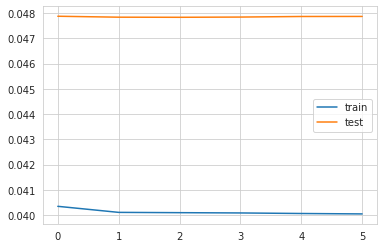

In [ ]:
# plot history
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()

In [ ]:
predictions=model.predict_generator(test_generator)

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1976: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


In [ ]:
predictions.shape[0]

38196

In [ ]:
predictions=np.absolute(predictions)
predictions

array([[0.12362257],
       [0.12500799],
       [0.13149549],
       ...,
       [0.11658827],
       [0.1213612 ],
       [0.1251612 ]], dtype=float32)

In [ ]:
y_test

array([0.01200655, 0.02164817, 0.00063671, ..., 0.01573586, 0.09523376,
       0.13616518])

In [ ]:
x_test

array([[1.20065490e-02, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [2.16481717e-02, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [6.36710933e-04, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 1.00000000e+00, 0.00000000e+00],
       ...,
       [1.57358559e-02, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 1.00000000e+00, 0.00000000e+00],
       [9.52337639e-02, 1.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.36165181e-01, 1.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00]])

In [ ]:
x_test[:,1:][win_length:]

array([[0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 1., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.]])

In [ ]:
df_pred=pd.concat([pd.DataFrame(predictions), pd.DataFrame(x_test[:,1:][win_length:])],axis=1)

In [ ]:
rev_trans=scalar.inverse_transform(df_pred)
rev_trans

array([[1.36210658e+03, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.37733781e+03, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.44866142e+03, 1.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       ...,
       [1.28477146e+03, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 1.00000000e+00, 0.00000000e+00],
       [1.33724507e+03, 1.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.37902224e+03, 1.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00]])

In [ ]:
df_final=data[predictions.shape[0]*-1:]

In [ ]:
df_final.count()

amount                                        38196
drug_AMINOPHYLLINE 100MG TABLET B/1000        38196
drug_AMOXICILLIN 250MG CAPSULE B/1000         38196
drug_ARTE 20MG + LUME 120MG TAB (4X6) B/30    38196
drug_CHLORPHENIRAMINE 4 MG TABLET B/1000      38196
drug_COTRIMOXAZOLE 480 MG TABLET B/1000       38196
drug_CROMOGLYCATE DISODIC OPHT SOLUTION 2%    38196
drug_IODINE POLYVIDONE 10%  SLN 200ML B/1     38196
drug_NEVIRAPINE 200MG TABLET B/60             38196
drug_O.R.S SACHET 20.5G B/100                 38196
drug_PARACETAMOL 500 MG TABLET B/1000         38196
distr_RW11                                    38196
distr_RW12                                    38196
distr_RW13                                    38196
distr_RW21                                    38196
distr_RW22                                    38196
distr_RW23                                    38196
distr_RW24                                    38196
distr_RW26                                    38196
distr_RW27  

In [ ]:
df_final['amount_pred']=rev_trans[:,0]
df_final

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,amount,drug_AMINOPHYLLINE 100MG TABLET B/1000,drug_AMOXICILLIN 250MG CAPSULE B/1000,drug_ARTE 20MG + LUME 120MG TAB (4X6) B/30,drug_CHLORPHENIRAMINE 4 MG TABLET B/1000,drug_COTRIMOXAZOLE 480 MG TABLET B/1000,drug_CROMOGLYCATE DISODIC OPHT SOLUTION 2%,drug_IODINE POLYVIDONE 10% SLN 200ML B/1,drug_NEVIRAPINE 200MG TABLET B/60,drug_O.R.S SACHET 20.5G B/100,drug_PARACETAMOL 500 MG TABLET B/1000,distr_RW11,distr_RW12,distr_RW13,distr_RW21,distr_RW22,distr_RW23,distr_RW24,distr_RW26,distr_RW27,distr_RW28,distr_RW31,distr_RW32,distr_RW33,distr_RW34,distr_RW35,distr_RW36,distr_RW37,distr_RW41,distr_RW42,distr_RW43,distr_RW44,distr_RW45,distr_RW51,distr_RW53,distr_RW54,distr_RW55,distr_RW56,distr_RW57,distr_Rw25,distr_Rw52,amount_pred
5622,205,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1362.106578
5626,60,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1377.337809
5651,500,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1448.661424
5694,20,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1467.874465
5706,9799,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1484.900136
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
266719,1874,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1281.921429
266821,4000,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1274.970731
266832,176,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1284.771464
266957,1050,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1337.245071


In [ ]:
df_final[['amount','amount_pred']]

,amount,amount_pred
5622,205,1362.106578
5626,60,1377.337809
5651,500,1448.661424
5694,20,1467.874465
5706,9799,1484.900136
...,...,...
266719,1874,1281.921429
266821,4000,1274.970731
266832,176,1284.771464
266957,1050,1337.245071


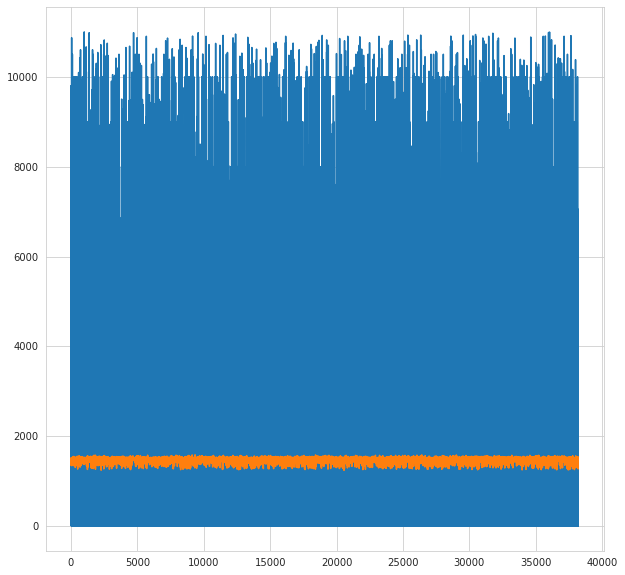

In [ ]:
plt.figure(figsize=(10, 10))

plt.plot(range(len(df_final['amount'])), df_final['amount'])
plt.plot(range(len(df_final['amount_pred'])), df_final['amount_pred'])

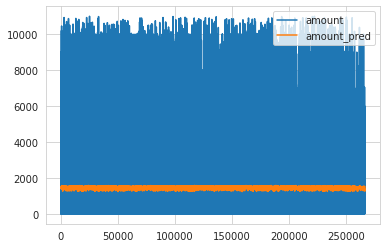

In [ ]:
df_final[['amount','amount_pred']].plot()